In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, recall_score, roc_auc_score
from sklearn.metrics import precision_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'catboost'

# **Data Preparation**

### **Deskripsi Data**

<ul>
    <li>Identitas pelanggan yang unik ditunjukkan oleh <strong>Customer ID</strong></li>
    <li>Lama waktu pelanggan berlangganan dengan perusahaan sampai akhir kuartal tertentu ditunjukkan oleh <strong>Tenure Months</strong></li>
    <li>Kota tempat tinggal pelanggan ditunjukkan oleh <strong>Location</strong></li>
    <li>Jenis perangkat yang digunakan oleh pelanggan ditunjukkan oleh <strong>Device Class</strong></li>
    <li>Penggunaan layanan internet untuk produk game oleh pelanggan ditunjukkan oleh <strong>Game Product</strong></li>
    <li>Penggunaan layanan internet untuk produk musik oleh pelanggan ditunjukkan oleh <strong>Music Product</strong></li>
    <li>Penggunaan layanan internet untuk produk pendidikan oleh pelanggan ditunjukkan oleh <strong>Education Product</strong></li>
    <li>Penggunaan layanan call center oleh pelanggan ditunjukkan oleh <strong>Call Center</strong></li>
    <li>Penggunaan layanan internet untuk produk video oleh pelanggan ditunjukkan oleh <strong>Video Product</strong></li>
    <li>Penggunaan layanan MyApp oleh pelanggan ditunjukkan oleh <strong>Use MyApp</strong></li>
    <li>Cara pembayaran tagihan oleh pelanggan ditunjukkan oleh <strong>Payment Method</strong></li>
    <li>Jumlah pengeluaran bulanan pelanggan untuk semua layanan dalam ribuan rupiah ditunjukkan oleh <strong>Monthly Purchase</strong></li>
    <li>Keputusan pelanggan untuk berhenti berlangganan layanan internet ditunjukkan oleh <strong>Churn Label</strong></li>
    <li>Koordinat bujur lokasi pelanggan ditunjukkan oleh <strong>Longitude</strong></li>
    <li>Koordinat lintang lokasi pelanggan ditunjukkan oleh <strong>Latitude</strong></li>
    <li>Nilai seumur hidup pelanggan ditunjukkan oleh <strong>CLTV</strong></li>
</ul>

### **Pertanyaan Bisnis**
<ul>
    <li>Bagaimana distribusi pelanggan menurut lokasi, kelas perangkat, metode pembayaran, dan kombinasi produk yang digunakan? <strong>(Done)</strong></li>
    <li>Produk mana yang memiliki rata-rata pengeluaran bulanan tertinggi dari pelanggan? <strong>(Done)</strong></li>
    <li>Apakah ada korelasi antara lama berlangganan (tenure months) dan keputusan berhenti berlangganan (churn label)? Apakah pelanggan yang lebih setia lebih rentan untuk churn? <strong>(Done)</strong></li>
    <li>Faktor apa saja yang berpengaruh terhadap nilai seumur hidup pelanggan (CLTV)? Bagaimana cara mengoptimalkan CLTV pelanggan? <strong>(Done)</strong></li>
    <li>Apakah layanan call center dan MyApp berkontribusi terhadap loyalitas pelanggan? Apakah pelanggan yang menggunakan layanan tersebut lebih jarang churn? <strong>(Done)</strong></li>
    <li>Produk apa yang paling diminati oleh pelanggan di setiap kota? Bagaimana cara mempromosikan produk tersebut sesuai dengan karakteristik pasar di setiap kota? <strong>(Done)</strong></li>
</ul>



### **Tahapan Analisis**
<ul>
    <li>Pengenalan Dataset</li>
    <li>Segmentasi Pelanggan
        <ul>
            <li>Segmentasi Tenure Months</li>
            <li>Segmentasi Monthly Purchase</li>
            <li>Segmentasi CLTV</li>
            <li>KMeans Clustering
                <ul>
                    <li>Penentuan nilai k yang paling optimal</li>
                    <li>Plot klasterisasi</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Exploratory Data Analysis
        <ul>
            <li>Korelasi Atribut Kategorikal dan Numerikal
                <ul>
                    <li>Korelasi atribut kategorikal berdasarkan churn label</li>
                    <li>Korelasi atribut numerikal berdasarkan churn label</li>
                </ul>
            </li>
            <li>Analisis kombinasi produk yang digunakan dengan tenure months
                <ul>
                    <li>Analisis tenure months dengan games product berdasarkan customer yang churn dan retain</li>
                    <li>Analisis tenure months dengan music product berdasarkan customer yang churn dan retain</li>
                    <li>Analisis tenure months dengan education product berdasarkan customer yang churn dan retain</li>
                    <li>Analisis tenure months dengan video product berdasarkan customer yang churn dan retain</li>
                </ul>
            </li>
            <li>Analisis atribut kategorikal
                <ul>
                    <li>Analisis atribut kategorikal untuk customer yang churn</li>
                    <li>Analisis atribut kategorikal untuk customer yang retain</li>
                    <li>Analisis persentase atribut kategorikal</li>
                </ul>
            </li>
            <li>Analisis atribut numerikal
                <ul>
                    <li>Analisis banyaknya customer yang churn berdasarkan lamanya pelanggan bergabung dengan perusahaan</li>
                    <li>Analisis banyaknya pelanggan yang churn berdasarkan pengeluaran pelanggan</li>
                    <li>Analisis banyaknya pelanggan yang churn berdasarkan CLTV</li>
                </ul>
            </li>
            <li>Analisis Kombinasi Layanan yang Digunakan dengan Tenure Months
                <ul>
                    <li>Analisis banyaknya customer yang churn dan retain berdasarkan layanan Call Center dengan lamanya pelanggan bergabung dengan perusahaan</li>
                    <li>Analisis banyaknya customer yang churn dan retain berdasarkan layanan Use MyApp dengan lamanya pelanggan bergabung dengan perusahaan</li>
                </ul>
            </li>
            <li>Analisis Perangkat Milik Pelanggan dengan Tenure Months
                <ul>
                    <li>Analisis banyaknya customer yang churn dan retain berdasarkan perangkat milik pelanggan dengan lamanya pelanggan bergabung dengan perusahaan</li>
                </ul>
            </li>
            <li>Analisis Jenis Pembayaran dengan Tenure Months
                <ul>
                    <li>Analisis banyaknya customer yang churn dan retain berdasarkan jenis pembayaran pelanggan dengan lamanya pelanggan bergabung dengan perusahaan</li>
                </ul>
            </li>
            <li>Analisis Distribusi Kombinasi Layanan berdasarkan pengeluaran bulanan pelanggan</li>
            <li>Analisis Distribusi Perangkat Milik Pelanggan berdasarkan pengeluaran bulanan pelanggan</li>
            <li>Analisis Distribusi Jenis Pembayaran Pelanggan berdasarkan pengeluaran bulanan pelanggan</li>
            <li>Analisis Distribusi Kombinasi Layanan berdasarkan CLTV</li>
            <li>Analisis Distribusi Perangkat Milik Pelanggan berdasarkan CLTV</li>
            <li>Analisis Distribusi Jenis Pembayaran Pelanggan berdasarkan CLTV</li>
            <!-- <li></li>
            <li></li>
            <li></li>  -->
        </ul>
    </li>
    <li>Feature Engineering
        <ul>
          <li>Scalling Data</li>
          <li>Matriks Korelasi</li>
          <li>Chi-Squared (Data Kategorikal)</li>
          <li>Anova (Data Numerikal)</li>
        </ul>
    </li>
    <li>Data Modelling
        <ul>
            <li>Preprocessing
                <ul>
                    <li>Proses pengubahan nilai atribut 'No internet service' menjadi 'No'</li>
                    <li>Proses pengelompokkan atribut (kategorikal, numerikal, binary, one hot)</li>
                    <li>Proses label encoder</li>
                </ul>
            </li>
            <li>Predicting Churn Label
                <ul>
                    <li>Pengelompokkam model dan pemilihan metrik evaluasi</li>
                    <li>Proses penanganan imbalance data dan penentuan recall terbaik</li>
                    <li>Plot ROC Curve LGBM</li>
                    <li>Hyperparams LightGBM</li>
                    <li>Validasi</li>
                    <li>Kesimpulan</li>
                </ul>
            </li>
            <li>Predicting CLTV
                <ul>
                    <li>Pengelompokkam model dan pemilihan metrik evaluasi</li>
                    <li>Plot aktual vs prediksi</li>
                    <li>Hyperparams LightGBM</li>
                    <li>Validasi</li>
                    <li>Kesimpulan</li>
                </ul>
            </li>
            <li>Testing
                <ul>
                    <li>Prediksi 1</li>
                    <li>Prediksi 2</li>
                    <li>Import ke pickle</li>
                    <li>Load dari pickle</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

### **Data Gathering**

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [70]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df.head()

Customer ID  Tenure Months Location Device Class Games Product  \
0            0              2  Jakarta      Mid End           Yes   
1            1              2  Jakarta     High End            No   
2            2              8  Jakarta     High End            No   
3            3             28  Jakarta     High End            No   
4            4             49  Jakarta     High End            No   

  Music Product Education Product Call Center Video Product Use MyApp  \
0           Yes                No          No            No        No   
1            No                No          No            No        No   
2            No               Yes          No           Yes       Yes   
3            No               Yes         Yes           Yes       Yes   
4           Yes               Yes          No           Yes       Yes   

   Payment Method  Monthly Purchase (Thou. IDR) Churn Label   Longitude  \
0  Digital Wallet                        70.005         Yes  106.816666   
1           Pulsa                        91.910         Yes  106.816666   
2           Pulsa                       129.545         Yes  106.816666   
3           Pulsa                       136.240         Yes  106.816666   
4           Debit                       134.810         Yes  106.816666   

   Latitude  CLTV (Predicted Thou. IDR)  
0      -6.2                      4210.7  
1      -6.2                      3511.3  
2      -6.2                      6983.6  
3      -6.2                      6503.9  
4      -6.2                      6942.0

In [71]:
df.rename(columns={'Monthly Purchase (Thou. IDR)' : 'Monthly Purchase', 'CLTV (Predicted Thou. IDR)' : 'CLTV'}, inplace=True)

In [50]:
df.columns
df['Monthly Purchase'].describe()

count    7043.000000
mean       84.190200
std        39.117061
min        23.725000
25%        46.150000
50%        91.455000
75%       116.805000
max       154.375000
Name: Monthly Purchase, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   int64  
 1   Tenure Months      7043 non-null   int64  
 2   Location           7043 non-null   object 
 3   Device Class       7043 non-null   object 
 4   Games Product      7043 non-null   object 
 5   Music Product      7043 non-null   object 
 6   Education Product  7043 non-null   object 
 7   Call Center        7043 non-null   object 
 8   Video Product      7043 non-null   object 
 9   Use MyApp          7043 non-null   object 
 10  Payment Method     7043 non-null   object 
 11  Monthly Purchase   7043 non-null   float64
 12  Churn Label        7043 non-null   object 
 13  Longitude          7043 non-null   float64
 14  Latitude           7043 non-null   float64
 15  CLTV               7043 non-null   float64
dtypes: float64(4), int64(2),

In [52]:
df['Customer ID'] = df['Customer ID'].astype(np.str_)

In [53]:
df.describe(include='O').T

count unique       top  freq
Customer ID        7043   7043         0     1
Location           7043      2   Jakarta  5031
Device Class       7043      3  High End  3096
Games Product      7043      3        No  3498
Music Product      7043      3        No  3088
Education Product  7043      3        No  3095
Call Center        7043      2        No  4999
Video Product      7043      3        No  2810
Use MyApp          7043      3        No  2785
Payment Method     7043      4     Pulsa  2365
Churn Label        7043      2        No  5174

Deskripsi di atas adalah hasil statistik deskriptif dari beberapa kolom dalam dataset. Mari kita periksa setiap kolom secara singkat:

1. **Customer ID:**
   - 7043 unik pelanggan.
   - Setiap pelanggan muncul satu kali.
   - Sejumlah 7043 entri.

2. **Location:**
   - 2 lokasi unik.
   - Jakarta adalah lokasi paling umum dengan frekuensi 5031.

3. **Device Class:**
   - 3 jenis perangkat.
   - High End adalah kelas perangkat paling umum dengan frekuensi 3096.

4. **Games Product, Music Product, Education Product, Call Center, Video Product, Use MyApp:**
   - 3 jenis nilai untuk masing-masing produk dan layanan.
   - No adalah nilai paling umum untuk masing-masing.

5. **Payment Method:**
   - 4 metode pembayaran.
   - Pulsa adalah metode pembayaran paling umum dengan frekuensi 2365.

6. **Churn Label:**
   - 2 label churn.
   - No (tidak berhenti berlangganan) adalah label paling umum dengan frekuensi 5174.

Ini memberikan gambaran singkat tentang variasi dan distribusi dalam setiap kolom dari dataset yang diberikan.

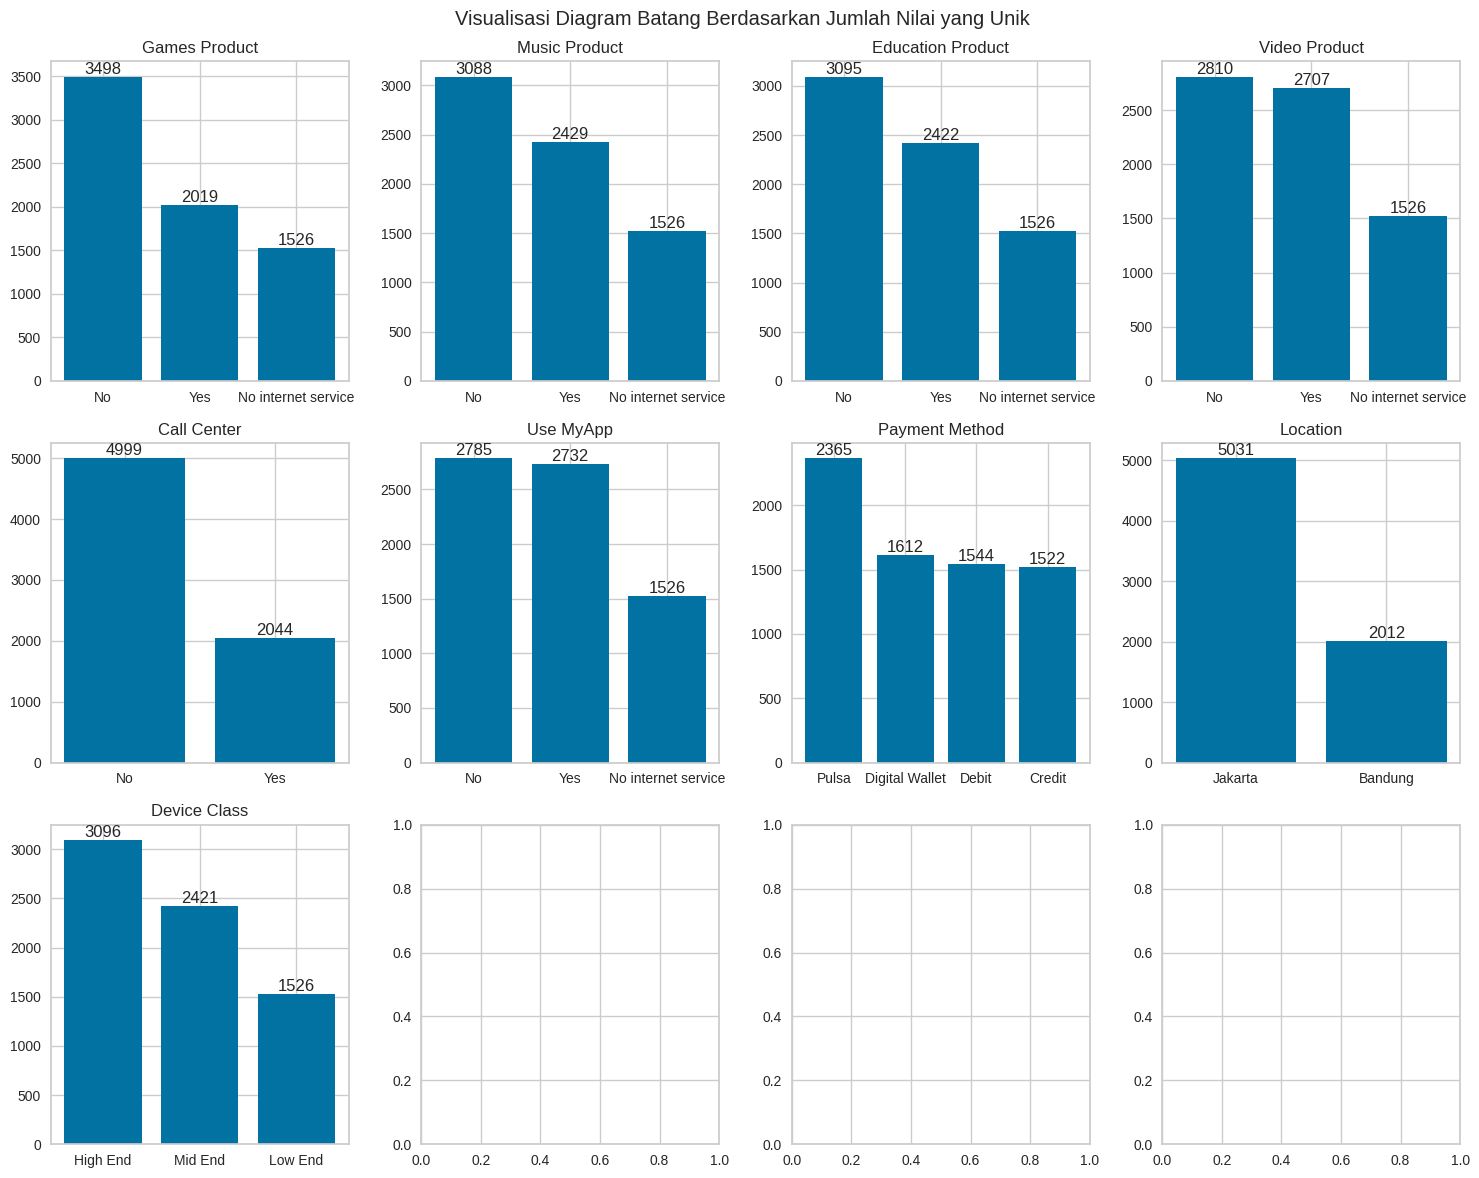

In [15]:
# Visualisasi jumlah kolom yang unik
kolom = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Call Center', 'Use MyApp', 'Payment Method', 'Location', 'Device Class']

df_temp = []

for k in kolom:
    count_values = df[k].value_counts()
    df_temp.append(pd.DataFrame({'Nilai Atribut': count_values.index, 'Jumlah Unik': count_values.values}))

fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('Visualisasi Diagram Batang Berdasarkan Jumlah Nilai yang Unik')

for i, ax in enumerate(axes.flatten()):
    if i < len(kolom):
        k = kolom[i]
        bars = ax.bar(df_temp[i]['Nilai Atribut'], df_temp[i]['Jumlah Unik'])
        ax.set_title(f'{k}')
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Plot memberikan gambaran singkat tentang distribusi nilai dalam beberapa kolom kategorikal dalam dataset

In [16]:
for k in df.columns:
    print(k, df[k].isna().sum())

Customer ID 0
Tenure Months 0
Location 0
Device Class 0
Games Product 0
Music Product 0
Education Product 0
Call Center 0
Video Product 0
Use MyApp 0
Payment Method 0
Monthly Purchase 0
Churn Label 0
Longitude 0
Latitude 0
CLTV 0


Kita dapat menyimpulkan, bahwa data tidak terdapat missing value

# **Segmentasi Pelanggan**

In [17]:
df_segment_retain = df[df['Churn Label'] == 'No']
df_segment_churn = df[df['Churn Label'] == 'Yes']

## **Tenure Months**

Selanjutnya, kita akan melakukan segmentasi pelanggan berdasarkan atribut "Tenure Months" dengan ketentuan sebagai berikut:
1. Jika "Tenure Months" bernilai antara 1 hingga 12, pelanggan akan dikategorikan sebagai pelanggan selama 1 tahun.
2. Jika "Tenure Months" bernilai antara 13 hingga 24, pelanggan akan dikategorikan sebagai pelanggan selama 2 tahun.
3. Jika "Tenure Months" bernilai antara 25 hingga 36, pelanggan akan dikategorikan sebagai pelanggan selama 3 tahun.
4. Jika "Tenure Months" bernilai antara 37 hingga 48, pelanggan akan dikategorikan sebagai pelanggan selama 4 tahun.
5. Jika "Tenure Months" bernilai antara 49 hingga 60, pelanggan akan dikategorikan sebagai pelanggan selama 5 tahun.
6. Selain dari rentang tersebut, pelanggan akan dikategorikan sebagai pelanggan selama 6 tahun.

Dengan pengkategorian ini, kita dapat memahami lebih jelas tentang sejauh mana pelanggan telah berlangganan dan menerapkan strategi yang sesuai untuk setiap kategori pelanggan berdasarkan durasi langganan mereka.

In [18]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 12:
        return 'Pelanggan 1 Tahun'
    elif 13 <= tenure <= 24:
        return 'Pelanggan 2 Tahun'
    elif 25 <= tenure <= 36:
        return 'Pelanggan 3 Tahun'
    elif 37 <= tenure <= 48:
        return 'Pelanggan 4 Tahun'
    elif 49 <= tenure <= 60:
        return 'Pelanggan 5 Tahun'
    else:
        return 'Pelanggan lebih dari 5 Tahun'

df['Tenure Status'] = df['Tenure Months'].apply(categorize_tenure)

df_tenure = pd.DataFrame(df['Tenure Status'].value_counts().reset_index())
df_tenure.columns = ['Tenure Status', 'Total Customer']
df_tenure.sort_values(by='Total Customer', ascending=True, inplace=True)
df_tenure

Tenure Status  Total Customer
5             Pelanggan 4 Tahun             762
3             Pelanggan 3 Tahun             832
4             Pelanggan 5 Tahun             832
2             Pelanggan 2 Tahun            1024
1  Pelanggan lebih dari 5 Tahun            1418
0             Pelanggan 1 Tahun            2175

### **Retain Customer**

In [19]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 12:
        return 'Pelanggan 1 Tahun'
    elif 13 <= tenure <= 24:
        return 'Pelanggan 2 Tahun'
    elif 25 <= tenure <= 36:
        return 'Pelanggan 3 Tahun'
    elif 37 <= tenure <= 48:
        return 'Pelanggan 4 Tahun'
    elif 49 <= tenure <= 60:
        return 'Pelanggan 5 Tahun'
    else:
        return 'Pelanggan lebih dari 5 Tahun'

df_segment_retain['Tenure Status'] = df_segment_retain['Tenure Months'].apply(categorize_tenure)

df_tenure = pd.DataFrame(df_segment_retain['Tenure Status'].value_counts().reset_index())
df_tenure.columns = ['Tenure Status', 'Total Customer']
df_tenure.sort_values(by='Total Customer', ascending=True, inplace=True)
df_tenure

Tenure Status  Total Customer
5             Pelanggan 4 Tahun             617
4             Pelanggan 3 Tahun             652
3             Pelanggan 5 Tahun             712
2             Pelanggan 2 Tahun             730
1             Pelanggan 1 Tahun            1138
0  Pelanggan lebih dari 5 Tahun            1325

### **Churn Customer**

In [20]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 12:
        return 'Pelanggan 1 Tahun'
    elif 13 <= tenure <= 24:
        return 'Pelanggan 2 Tahun'
    elif 25 <= tenure <= 36:
        return 'Pelanggan 3 Tahun'
    elif 37 <= tenure <= 48:
        return 'Pelanggan 4 Tahun'
    elif 49 <= tenure <= 60:
        return 'Pelanggan 5 Tahun'
    else:
        return 'Pelanggan lebih dari 5 Tahun'

df_segment_churn['Tenure Status'] = df_segment_churn['Tenure Months'].apply(categorize_tenure)

df_tenure = pd.DataFrame(df_segment_churn['Tenure Status'].value_counts().reset_index())
df_tenure.columns = ['Tenure Status', 'Total Customer']
df_tenure.sort_values(by='Total Customer', ascending=True, inplace=True)
df_tenure

Tenure Status  Total Customer
5  Pelanggan lebih dari 5 Tahun              93
4             Pelanggan 5 Tahun             120
3             Pelanggan 4 Tahun             145
2             Pelanggan 3 Tahun             180
1             Pelanggan 2 Tahun             294
0             Pelanggan 1 Tahun            1037

## **Monthly Purchase**

Selanjutnya, akan dibuat kuartil dengan pembagian Q1 sampai Q3 untuk membagi pelanggan menjadi tiga segmen berdasarkan Monthly Purchase.

In [21]:
quantile = df['Monthly Purchase'].quantile([0.25, 0.5, 0.75])

def categorized_purchased(monthly_purchase):
    if monthly_purchase <= quantile[0.25]:
        return 'Pembelian Rendah'
    elif monthly_purchase <= quantile[0.5]:
        return 'Pembelian Menengah'
    else:
        return 'Pembelian Tinggi'

df['Monthly Purchase Category'] = df['Monthly Purchase'].apply(categorized_purchased)

df_monthly_purchase = pd.DataFrame(df['Monthly Purchase Category'].value_counts().reset_index())
df_monthly_purchase.columns = ['Monthly Purchase Category', 'Total Customer']
df_monthly_purchase.sort_values(by='Total Customer', ascending=True, inplace=True)
df_monthly_purchase

Monthly Purchase Category  Total Customer
2          Pembelian Rendah            1762
1        Pembelian Menengah            1766
0          Pembelian Tinggi            3515

Dari data diatas dapat dilihat, bahwa ada sebanyak 3515 pelanggan dengan kategori Pembelian Tinggi, 1766 pelanggan dengan kategori Pembelian Menengah, dan 1762 pelanggan dengan kategori Pembelian Rendah.

### **Retain Customer**

In [22]:
quantile = df_segment_retain['Monthly Purchase'].quantile([0.25, 0.5, 0.75])

def categorized_purchased(monthly_purchase):
    if monthly_purchase <= quantile[0.25]:
        return 'Pembelian Rendah'
    elif monthly_purchase <= quantile[0.5]:
        return 'Pembelian Menengah'
    else:
        return 'Pembelian Tinggi'

df_segment_retain['Monthly Purchase Category'] = df_segment_retain['Monthly Purchase'].apply(categorized_purchased)

df_monthly_purchase = pd.DataFrame(df_segment_retain['Monthly Purchase Category'].value_counts().reset_index())
df_monthly_purchase.columns = ['Monthly Purchase Category', 'Total Customer']
df_monthly_purchase.sort_values(by='Total Customer', ascending=True, inplace=True)
df_monthly_purchase

Monthly Purchase Category  Total Customer
2        Pembelian Menengah            1281
1          Pembelian Rendah            1306
0          Pembelian Tinggi            2587

### **Churn Customer**

In [23]:
quantile = df_segment_churn['Monthly Purchase'].quantile([0.25, 0.5, 0.75])

def categorized_purchased(monthly_purchase):
    if monthly_purchase <= quantile[0.25]:
        return 'Pembelian Rendah'
    elif monthly_purchase <= quantile[0.5]:
        return 'Pembelian Menengah'
    else:
        return 'Pembelian Tinggi'

df_segment_churn['Monthly Purchase Category'] = df_segment_churn['Monthly Purchase'].apply(categorized_purchased)

df_monthly_purchase = pd.DataFrame(df_segment_churn['Monthly Purchase Category'].value_counts().reset_index())
df_monthly_purchase.columns = ['Monthly Purchase Category', 'Total Customer']
df_monthly_purchase.sort_values(by='Total Customer', ascending=True, inplace=True)
df_monthly_purchase

Monthly Purchase Category  Total Customer
2          Pembelian Rendah             468
1        Pembelian Menengah             471
0          Pembelian Tinggi             930

## **CLTV**

Selanjutnya, akan dibuat kuartil dengan pembagian Q1 sampai Q3 untuk membagi pelanggan menjadi tiga segmen berdasarkan CLTV.

In [24]:
quartiles = df['CLTV'].quantile([0.25, 0.5, 0.75])

def categorized_cltv(cltv):
    if cltv <= quartiles[0.25]:
        return 'CLTV Rendah'
    elif cltv <= quartiles[0.5]:
        return 'CLTV Menengah'
    else:
        return 'CLTV Tinggi'

df['CLTV Category'] = df['CLTV'].apply(categorized_cltv)

df_cltv = pd.DataFrame(df['CLTV Category'].value_counts().reset_index())
df_cltv.columns = ['CLTV Category', 'Total Customer']
df_cltv.sort_values(by='Total Customer', ascending=True, inplace=True)
df_cltv

CLTV Category  Total Customer
2  CLTV Menengah            1759
1    CLTV Rendah            1763
0    CLTV Tinggi            3521

Dari data diatas dapat dilihat, bahwa ada sebanyak 3521 pelanggan dengan kategori CLTV Tinggi, 1759 pelanggan dengan kategori Pembelian Menengah, dan 1763 pelanggan dengan kategori Pembelian Rendah.

### **Retain Customer**

In [25]:
quartiles = df_segment_retain['CLTV'].quantile([0.25, 0.5, 0.75])

def categorized_cltv(cltv):
    if cltv <= quartiles[0.25]:
        return 'CLTV Rendah'
    elif cltv <= quartiles[0.5]:
        return 'CLTV Menengah'
    else:
        return 'CLTV Tinggi'

df_segment_retain['CLTV Category'] = df_segment_retain['CLTV'].apply(categorized_cltv)

df_cltv = pd.DataFrame(df_segment_retain['CLTV Category'].value_counts().reset_index())
df_cltv.columns = ['CLTV Category', 'Total Customer']
df_cltv.sort_values(by='Total Customer', ascending=True, inplace=True)
df_cltv

CLTV Category  Total Customer
1  CLTV Menengah            1294
2    CLTV Rendah            1294
0    CLTV Tinggi            2586

### **Churn Customer**

In [26]:
quartiles = df_segment_churn['CLTV'].quantile([0.25, 0.5, 0.75])

def categorized_cltv(cltv):
    if cltv <= quartiles[0.25]:
        return 'CLTV Rendah'
    elif cltv <= quartiles[0.5]:
        return 'CLTV Menengah'
    else:
        return 'CLTV Tinggi'

df_segment_churn['CLTV Category'] = df_segment_churn['CLTV'].apply(categorized_cltv)

df_cltv = pd.DataFrame(df_segment_churn['CLTV Category'].value_counts().reset_index())
df_cltv.columns = ['CLTV Category', 'Total Customer']
df_cltv.sort_values(by='Total Customer', ascending=True, inplace=True)
df_cltv

CLTV Category  Total Customer
2  CLTV Menengah             467
1    CLTV Rendah             468
0    CLTV Tinggi             934

## **KMeans Clustering**

In [83]:
cluster = df.copy(deep=True)

### **Penentuan nilai k yang paling optimal**

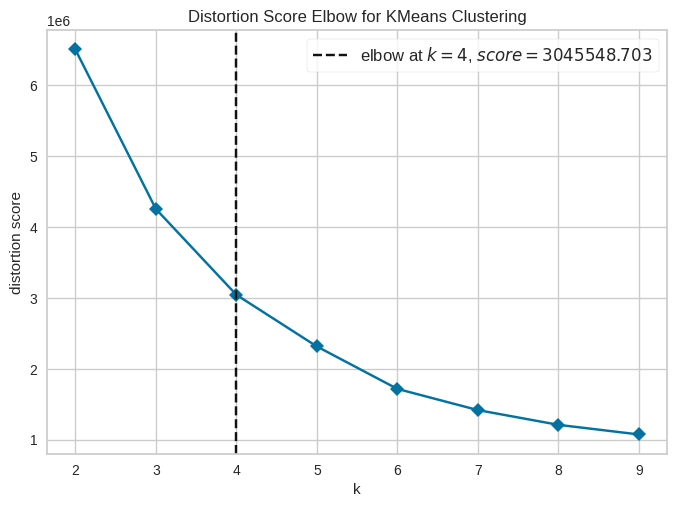

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
X = cluster.iloc[:, [1, 11]].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()

Nilai k yang optimal adalah 4 berdasarkan visualisasi elbow method diatas

In [95]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

### **Plot Klasterisasi**

In [97]:
plot_cluster = pd.DataFrame({'X1': X[y_kmeans == 0, 0],
                             'X2': X[y_kmeans == 0, 1],
                             'Cluster': 'Cluster 1'})
plot_cluster = plot_cluster.append(pd.DataFrame({'X1': X[y_kmeans == 1, 0],
                             'X2': X[y_kmeans == 1, 1],
                             'Cluster': 'Cluster 2'}))
plot_cluster = plot_cluster.append(pd.DataFrame({'X1': X[y_kmeans == 2, 0],
                             'X2': X[y_kmeans == 2, 1],
                             'Cluster': 'Cluster 3'}))
plot_cluster = plot_cluster.append(pd.DataFrame({'X1': X[y_kmeans == 3, 0],
                             'X2': X[y_kmeans == 3, 1],
                             'Cluster': 'Cluster 4'}))

fig = px.scatter(plot_cluster, x='X1', y='X2', color='Cluster', title='K-Means Clustering')
fig.update_xaxes(title_text='Tenure Months')
fig.update_yaxes(title_text='Monthly Purchase')

fig.show()

Grafik diatas sudah terbagi menjadi 4 cluster, yang artinya dapat di kategorikan menjadi beberapa kelompok
- Kelompok 1: Low Purchase Short-Term Customers
- Kelompok 2: High Purchase Short-Term Customers
- Kelompok 3: Low Purchase Long-Term Customers
- Kelompok 4: High Purchase Long-Term Customers

In [87]:
df['Cluster'] = y_kmeans

def label_clusters(row):
    if row['Cluster'] == 0:
        return "Low Purchase Short-Term Customers"
    elif row['Cluster'] == 1:
        return "High Purchase Short-Term Customers"
    elif row['Cluster'] == 2:
        return "Low Purchase Long Term Customers"
    elif row['Cluster'] == 3:
        return "High Purchase Long-Term Customers"
    else:
        return "Other"

df['Monthly Purchase Label'] = df.apply(label_clusters, axis=1)

In [88]:
# Retain customer
data = {
    'Customer Type': df[df['Churn Label'] == 'No']['Monthly Purchase Label'].value_counts().index,
    'Count': df[df['Churn Label'] == 'No']['Monthly Purchase Label'].value_counts().values
}

cluster_retain = pd.DataFrame(data)

fig = px.pie(cluster_retain, names='Customer Type', values='Count', title='Distribusi Monthly Purchase Retain Customer')
fig.show()

In [89]:
# Churn customer
data = {
    'Customer Type': df[df['Churn Label'] == 'Yes']['Monthly Purchase Label'].value_counts().index,
    'Count': df[df['Churn Label'] == 'Yes']['Monthly Purchase Label'].value_counts().values
}

cluster_churn = pd.DataFrame(data)

fig = px.pie(cluster_churn, names='Customer Type', values='Count', title='Distribusi Monthly Purchase Churn Customer')
fig.show()

# **Exploratory Data Analysis**

In [ ]:
fig = px.pie(df.groupby('Churn Label')['Customer ID'].nunique().reset_index(), values='Customer ID', names='Churn Label')
fig.update_layout(title='Persentase Customer yang Churn')
fig.show()

Berdasarkan pie chart diatas, dapat disimpulkan bahwa sebanyak 26.5% atau sebanyak 1869 pelanggan berhenti berlangganan layanan, dan sebanyak 73.5% atau sebanyak 5174 pelanggan masih berlangganan layanan.

## **Korelasi atribut kategorikal dan numerikal**

### **Korelasi atribut kategorikal berdasarkan churn label**

In [ ]:
corr_df = df.copy()
corr_df['Churn Label'].replace({'Yes': 1, 'No': 0}, inplace=True)

dummies = pd.get_dummies(corr_df[['Churn Label', 'Device Class', 'Games Product', 'Music Product',
                                  'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
                                  'Payment Method']])

df_dummies = pd.DataFrame({'Feature': dummies.columns,
                           'Correlation': dummies.corr()['Churn Label']
                           }).sort_values(by='Correlation', ascending=False)

bar = go.Bar(x=df_dummies['Feature'][1:], y=df_dummies['Correlation'][1:])

layout = go.Layout(title='Korelasi Data Kategorikal dengan Customer yang Churn',
                   xaxis=dict(title='Fitur'),
                   yaxis=dict(title='Korelasi'),
                   height=800)

fig = go.Figure(data=bar, layout=layout)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

Output tersebut adalah koefisien korelasi antara variabel-variabel yang tercantum dengan variabel target, yaitu "Churn Label". Korelasi berkisar antara -1 dan 1, dengan nilai positif menunjukkan korelasi positif, nilai negatif menunjukkan korelasi negatif, dan nilai 0 menunjukkan tidak adanya korelasi.

Berikut adalah penjelasan singkat untuk beberapa variabel yang memiliki korelasi yang cukup signifikan:

1. **Device Class_High End:**
   - Korelasi positif sekitar 0.308.
   - Pelanggan dengan perangkat kelas tinggi cenderung lebih cenderung untuk melakukan churn.

2. **Device Class_Low End:**
   - Korelasi negatif sekitar -0.228.
   - Pelanggan dengan perangkat kelas rendah cenderung kurang cenderung untuk melakukan churn.

3. **Games Product_No:**
   - Korelasi positif sekitar 0.343.
   - Pelanggan yang tidak menggunakan layanan produk game cenderung lebih cenderung untuk melakukan churn.

4. **Music Product_No:**
   - Korelasi positif sekitar 0.268.
   - Pelanggan yang tidak menggunakan layanan produk musik cenderung lebih cenderung untuk melakukan churn.

5. **Education Product_No:**
   - Korelasi positif sekitar 0.252.
   - Pelanggan yang tidak menggunakan layanan produk edukasi cenderung lebih cenderung untuk melakukan churn.

6. **Call Center_No:**
   - Korelasi positif sekitar 0.165.
   - Pelanggan yang tidak menggunakan layanan call center cenderung lebih cenderung untuk melakukan churn.

7. **Video Product_Yes:**
   - Korelasi positif sekitar 0.063.
   - Pelanggan yang menggunakan layanan produk video cenderung lebih cenderung untuk tidak melakukan churn.

8. **Payment Method_Pulsa:**
   - Korelasi positif sekitar 0.302.
   - Pelanggan yang menggunakan metode pembayaran pulsa cenderung lebih cenderung untuk melakukan churn.

Kesimpulan:
- Beberapa variabel memiliki korelasi positif yang cukup tinggi dengan "Churn Label", menunjukkan bahwa ketika nilai variabel tersebut meningkat, kemungkinan churn juga meningkat.
- Sebaliknya, beberapa variabel memiliki korelasi negatif yang cukup tinggi, menunjukkan bahwa ketika nilai variabel tersebut meningkat, kemungkinan churn lebih rendah.
- Variabel seperti jenis perangkat, penggunaan layanan produk, layanan call center, dan metode pembayaran tampaknya mempengaruhi keputusan churn pelanggan. Perusahaan dapat menggunakan informasi ini untuk merancang strategi retensi yang lebih efektif sesuai dengan karakteristik pelanggan.

### **Korelasi atribut numerikal berdasarkan churn label**

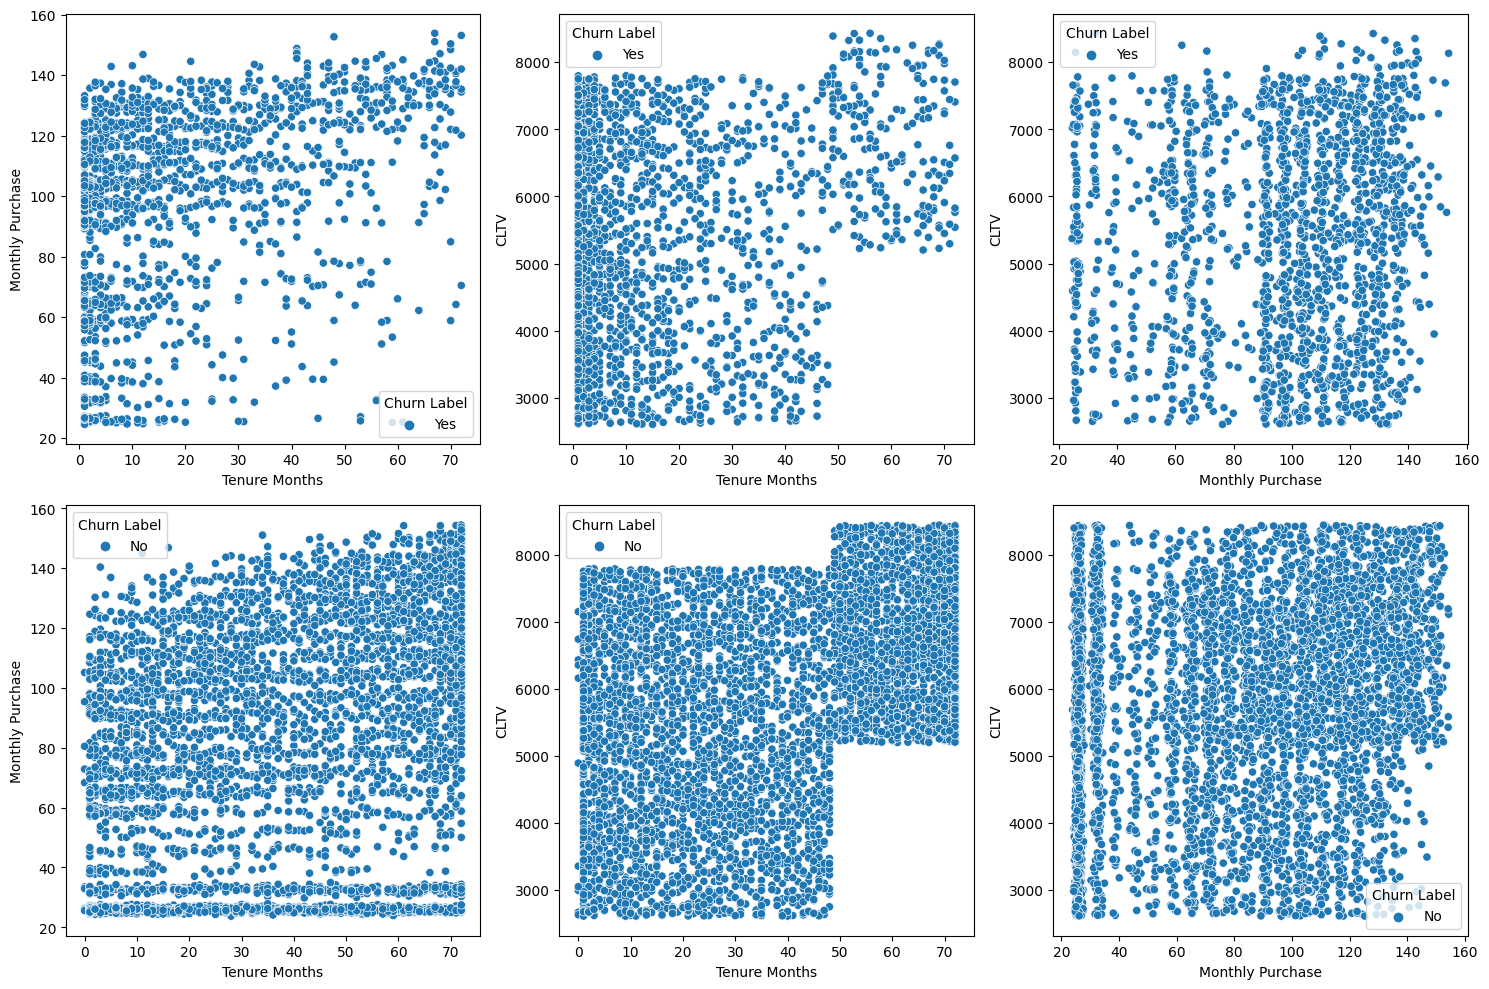

In [ ]:
numerical = ['Tenure Months', 'Monthly Purchase', 'CLTV']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.scatterplot(x=numerical[0], y=numerical[1], data=df[df['Churn Label'] == 'Yes'], hue='Churn Label', ax=ax[0, 0])
sns.scatterplot(x=numerical[0], y=numerical[2], data=df[df['Churn Label'] == 'Yes'], hue='Churn Label', ax=ax[0, 1])
sns.scatterplot(x=numerical[1], y=numerical[2], data=df[df['Churn Label'] == 'Yes'], hue='Churn Label', ax=ax[0, 2])
sns.scatterplot(x=numerical[0], y=numerical[1], data=df[df['Churn Label'] == 'No'], hue='Churn Label', ax=ax[1, 0])
sns.scatterplot(x=numerical[0], y=numerical[2], data=df[df['Churn Label'] == 'No'], hue='Churn Label', ax=ax[1, 1])
sns.scatterplot(x=numerical[1], y=numerical[2], data=df[df['Churn Label'] == 'No'], hue='Churn Label', ax=ax[1, 2])
plt.tight_layout()

Dilihat dari hasil plot di atas, visualisasi antara CLTV dan Tenure Months menunjukkan pola yang menarik. Pada rentang nilai Tenure Months sekitar 50 ke atas, terlihat bahwa nilai CLTV pelanggan tembus di atas 8000, bahkan mencapai angka 5000. Di sisi lain, pada rentang nilai Tenure Months sekitar 50 ke bawah, nilai CLTV pelanggan tidak mencapai angka 8000 dan bahkan turun di bawah 5000.

Pola ini menunjukkan bahwa pelanggan dengan Tenure Months yang lebih tinggi cenderung memiliki nilai CLTV yang lebih tinggi, sementara pelanggan dengan Tenure Months yang lebih rendah memiliki nilai CLTV yang lebih rendah. Hal ini bisa menjadi indikasi bahwa pelanggan yang tetap berlangganan untuk jangka waktu yang lebih lama cenderung memberikan nilai CLTV yang lebih tinggi. Analisis lebih lanjut dapat memberikan wawasan yang lebih mendalam terkait dengan faktor-faktor apa yang memengaruhi pola ini.



Kita juga dapat melihat berdasarkan plot di atas, terlihat bahwa terdapat hubungan korelasi positif sedang antara Monthly Purchase dan Tenure Months pada kategori pelanggan yang churn. Artinya, pelanggan yang berhenti berlangganan cenderung memiliki kecenderungan untuk memiliki Monthly Purchase yang lebih tinggi seiring dengan bertambahnya Tenure Months atau lama berlangganannya.

Hal ini bisa diartikan bahwa pelanggan yang berlangganan lebih lama mungkin cenderung melakukan pembelian bulanan yang lebih besar, namun pada suatu titik tertentu, ada pelanggan yang berhenti berlangganan meskipun telah berlangganan untuk waktu yang cukup lama.


In [ ]:
grouped = df.groupby('Tenure Months')

tenure_months = []
max_cltv_values = []
min_cltv_values = []

for i in range(1, df['Tenure Months'].nunique()):
    subset = grouped.get_group(i)

    if not subset.empty:
        max_cltv = subset['CLTV'].max()
        min_cltv = subset['CLTV'].min()

        tenure_months.append(i)
        max_cltv_values.append(max_cltv)
        min_cltv_values.append(min_cltv)
    else:
        tenure_months.append(i)
        max_cltv_values.append(None)
        min_cltv_values.append(None)

plot_data = pd.DataFrame({'Tenure Months': tenure_months, 'Max CLTV': max_cltv_values, 'Min CLTV': min_cltv_values})

fig = px.scatter(plot_data, x='Tenure Months', y=['Max CLTV', 'Min CLTV'], labels={'value': 'CLTV'})

fig.update_layout(
    title='Max dan Min CLTV berdasarkan Tenure Months',
    xaxis_title='Tenure Months',
    yaxis_title='CLTV',
)

fig.show()

Berdasarkan plot diatas, nilai CLTV lebih besar dari 8000 dan tidak kurang dari 5000 pada tenure months yang di mulai dari tenure months ke 49 sd 72, sedangkan nilai CLTV yang lebih kecil dari 8000 dan kurang dari 5000 (dalam kasus ini di sekitaran 2000 sd 3000an) pada tenure months yang di mulai dari tenure months ke 48 sd 1.

Salah satu kemungkinan penjelasan adalah bahwa pelanggan yang memiliki tenure months lebih dari 48 adalah pelanggan yang lebih loyal dan puas dengan layanan telco. Mereka mungkin telah menggunakan berbagai layanan tambahan, seperti beberapa atribut kategorikal yang disebutkan di dalam dataset. Hal ini dapat meningkatkan nilai Monthly Charges, yang mungkin berdampak pada nilai CLTV yang lebih tinggi.

Pelanggan yang memiliki tenure months kurang dari 49 mungkin adalah pelanggan yang baru bergabung atau yang berencana untuk berhenti. Mereka mungkin hanya menggunakan layanan dasar, seperti use my app sehingga tidak tertarik dengan layanan yang lainnya. Hal ini dapat menurunkan nilai monthly charges, yang mungkin berdampak pada nilai CLTV yang lebih rendah

Untuk memastikan hipotesis ini, maka akan dilakukan analisis lebih lanjut dengan melihat hubungan antara tenure months dan fitur fitur lainnya, seperti kombinasi produk yang digunakan.

## **Analisis kombinasi produk yang digunakan dengan tenure months**

Dalam kasus ini, beberapa atribut yang akan dianalisis dalam kombinasi produk adalah game product, music product, education product, dan video product

In [ ]:
# Untuk semua nilai atribut product yang bernilai yes dan churn
product_churn = df[(df['Games Product'] == 'Yes') & (df['Music Product'] == 'Yes') & (df['Education Product'] == 'Yes') & (df['Video Product'] == 'Yes') & (df['Churn Label'] == 'Yes')]
product_churn[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
1017             58           142.285  8351.2
997              54           142.675  8156.2
1347             67           153.855  8131.5
916              70           142.350  7976.8
1596             70           148.460  7731.1

In [ ]:
# Untuk semua nilai atribut product yang berniali yes dan retain
product_retain = df[(df['Games Product'] == 'Yes') & (df['Music Product'] == 'Yes') & (df['Education Product'] == 'Yes') & (df['Video Product'] == 'Yes') & (df['Churn Label'] == 'No')]
product_retain[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
3482             56           111.345  8450.0
3446             62           149.565  8442.2
5964             72           151.320  8438.3
6994             62            93.600  8435.7
5051             69           117.845  8433.1

In [ ]:
# Untuk semua nilai atribut product yang bernilai yes
product = df[(df['Games Product'] == 'Yes') & (df['Music Product'] == 'Yes') & (df['Education Product'] == 'Yes') & (df['Video Product'] == 'Yes')]
product[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
3482             56           111.345  8450.0
3446             62           149.565  8442.2
5964             72           151.320  8438.3
6994             62            93.600  8435.7
5051             69           117.845  8433.1

In [ ]:
# Untuk semua atribut product yang bernilai no dan churn
no_product_churn = df[(df['Games Product'] == 'No') & (df['Music Product'] == 'No') & (df['Education Product'] == 'No') & (df['Video Product'] == 'No') & (df['Churn Label'] == 'Yes')]
no_product_churn[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
220              59           111.215  8195.2
960               1            59.540  7764.9
1422             13           105.105  7753.2
1318              1            91.390  7751.9
1305              1            57.330  7741.5

In [ ]:
# Untuk semua atribut product yang bernilai no dan retain
no_product_retain = df[(df['Games Product'] == 'No') & (df['Music Product'] == 'No') & (df['Education Product'] == 'No') & (df['Video Product'] == 'No') & (df['Churn Label'] == 'No')]
no_product_retain[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
5393             53           118.495  8370.7
1900             49           109.850  8364.2
2257             55           111.150  8334.3
2231             72           109.850  8062.6
4761             50            58.240  7949.5

In [ ]:
# Untuk semua atribut product yang bernilai no
no_product = df[(df['Games Product'] == 'No') & (df['Music Product'] == 'No') & (df['Education Product'] == 'No') & (df['Video Product'] == 'No')]
no_product[['Tenure Months', 'Monthly Purchase', 'CLTV']].sort_values(by='CLTV', ascending=False).head()

Tenure Months  Monthly Purchase    CLTV
5393             53           118.495  8370.7
1900             49           109.850  8364.2
2257             55           111.150  8334.3
220              59           111.215  8195.2
2231             72           109.850  8062.6

### **Analisis tenure months dengan games product berdasarkan customer yang churn dan retain**

In [ ]:
# Churn customer
pivot_yes_tenure_game = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Games Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_game.index, y=pivot_yes_tenure_game['No']),
    go.Line(name='Yes', x=pivot_yes_tenure_game.index, y=pivot_yes_tenure_game['Yes']),
    go.Line(name='No internet service', x=pivot_yes_tenure_game.index, y=pivot_yes_tenure_game['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Churn by Tenure Months and Games Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang melakukan churn (Churn Label 'Yes') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk game (Games Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Games Product 'No' (Tidak Menggunakan Layanan Game):**
   - Jumlah pelanggan yang churn cenderung tinggi pada bulan-bulan awal berlangganan.
   - Kemudian, jumlahnya cenderung menurun seiring berjalannya waktu.
   - Pada bulan-bulan akhir, ada sedikit peningkatan.

2. **Games Product 'Yes' (Menggunakan Layanan Game):**
   - Jumlah pelanggan yang churn cenderung bervariasi, namun lebih rendah dibandingkan dengan yang tidak menggunakan layanan game.
   - Tren umum menunjukkan penurunan jumlah churn seiring lamanya berlangganan.

3. **No Internet Service:**
   - Terdapat pelanggan yang melakukan churn tanpa menggunakan layanan internet.
   - Namun, jumlahnya cenderung lebih rendah dibandingkan dengan yang menggunakan layanan internet.


In [ ]:
# Retain customer
pivot_no_tenure_game = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Games Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_game.index, y=pivot_no_tenure_game['No']),
    go.Line(name='Yes', x=pivot_no_tenure_game.index, y=pivot_no_tenure_game['Yes']),
    go.Line(name='No internet service', x=pivot_no_tenure_game.index, y=pivot_no_tenure_game['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Retain by Tenure Months and Games Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhasil dipertahankan (Churn Label 'No') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk game (Games Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Games Product 'Yes' (Menggunakan Layanan Game):**
   - Pada bulan-bulan awal berlangganan, jumlah pelanggan yang berhasil dipertahankan cenderung rendah.
   - Seiring berjalannya waktu, terjadi peningkatan yang signifikan dalam jumlah pelanggan yang berhasil dipertahankan.

2. **Games Product 'No' (Tidak Menggunakan Layanan Game):**
   - Jumlah pelanggan yang berhasil dipertahankan cenderung stabil dan relatif rendah seiring berjalannya waktu.
   - Meskipun ada variasi, tidak terlihat tren penurunan yang cukup signifikan.

3. **No Internet Service:**
   - Terdapat pelanggan yang berhasil dipertahankan tanpa menggunakan layanan internet, terutama pada bulan-bulan awal dan akhir berlangganan.
   - Namun, jumlahnya cenderung lebih rendah dibandingkan dengan yang menggunakan layanan internet.


### **Analisis tenure months dengan music product berdasarkan customer yang churn dan retain**

In [ ]:
# Churn customer
pivot_yes_tenure_music = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Music Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_music.index, y=pivot_yes_tenure_music['No']),
    go.Line(name='Yes', x=pivot_yes_tenure_music.index, y=pivot_yes_tenure_music['Yes']),
    go.Line(name='No internet service', x=pivot_yes_tenure_music.index, y=pivot_yes_tenure_music['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Churn by Tenure Months and Music Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang melakukan churn (Churn Label 'Yes') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk musik (Music Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Music Product 'No' (Tidak Menggunakan Layanan Musik):**
   - Jumlah pelanggan yang melakukan churn cenderung tinggi pada bulan-bulan awal berlangganan.
   - Terdapat variasi, namun secara umum, trend churn menurun seiring berjalannya waktu.

2. **Music Product 'Yes' (Menggunakan Layanan Musik):**
   - Jumlah pelanggan yang melakukan churn juga bervariasi, namun relatif lebih stabil dibandingkan dengan yang tidak menggunakan layanan musik.
   - Tidak terlihat tren yang jelas terkait dengan lamanya berlangganan.

3. **No Internet Service:**
   - Terdapat pelanggan yang melakukan churn tanpa menggunakan layanan internet.
   - Jumlahnya relatif rendah dibandingkan dengan yang menggunakan layanan internet.

In [ ]:
# Retain customer
pivot_no_tenure_music = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Music Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_music.index, y=pivot_no_tenure_music['No']),
    go.Line(name='Yes', x=pivot_no_tenure_music.index, y=pivot_no_tenure_music['Yes']),
    go.Line(name='No internet service', x=pivot_no_tenure_music.index, y=pivot_no_tenure_music['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Retain by Tenure Months and Music Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap bertahan (Churn Label 'No') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk musik (Music Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Music Product 'No' (Tidak Menggunakan Layanan Musik):**
   - Jumlah pelanggan yang bertahan cenderung tinggi pada bulan-bulan awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang bertahan mengalami fluktuasi, namun secara keseluruhan tetap stabil.

2. **Music Product 'Yes' (Menggunakan Layanan Musik):**
   - Jumlah pelanggan yang menggunakan layanan musik dan tetap bertahan juga cenderung rendah pada awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang bertahan dengan menggunakan layanan musik mengalami peningkatan.

3. **No Internet Service:**
   - Terdapat pelanggan yang bertahan tanpa menggunakan layanan internet.
   - Jumlahnya relatif rendah dibandingkan dengan yang menggunakan layanan internet.

### **Analisis tenure months dengan education product berdasarkan customer yang churn dan retain**

In [ ]:
# Churn customer
pivot_yes_tenure_education = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Education Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_education.index, y=pivot_yes_tenure_education['No']),
    go.Line(name='Yes', x=pivot_yes_tenure_education.index, y=pivot_yes_tenure_education['Yes']),
    go.Line(name='No internet service', x=pivot_yes_tenure_education.index, y=pivot_yes_tenure_education['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Churn by Tenure Months and Education Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk pendidikan (Education Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Education Product 'No' (Tidak Menggunakan Layanan Pendidikan):**
   - Jumlah pelanggan yang berhenti berlangganan cenderung tinggi pada bulan-bulan awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang berhenti berlangganan cenderung stabil atau mengalami penurunan.

2. **Education Product 'Yes' (Menggunakan Layanan Pendidikan):**
   - Jumlah pelanggan yang menggunakan layanan pendidikan dan berhenti berlangganan juga cenderung tinggi pada awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang berhenti berlangganan dengan menggunakan layanan pendidikan tetap stabil atau mengalami penurunan.

3. **No Internet Service:**
   - Terdapat pelanggan yang berhenti berlangganan tanpa menggunakan layanan internet.
   - Jumlahnya relatif rendah dibandingkan dengan yang menggunakan layanan internet.

In [ ]:
# Retain customer
pivot_no_tenure_education = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Education Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_education.index, y=pivot_no_tenure_education['No']),
    go.Line(name='Yes', x=pivot_no_tenure_education.index, y=pivot_no_tenure_education['Yes']),
    go.Line(name='No internet service', x=pivot_no_tenure_education.index, y=pivot_no_tenure_education['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Retain by Tenure Months and Education Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk pendidikan (Education Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Education Product 'No' (Tidak Menggunakan Layanan Pendidikan):**
   - Jumlah pelanggan yang tetap berlangganan lebih tinggi pada bulan-bulan awal berlangganan dan cenderung stabil seiring berjalannya waktu.
   - Pelanggan yang tidak menggunakan layanan pendidikan (Education Product 'No') cenderung memiliki tingkat retensi yang baik.

2. **Education Product 'Yes' (Menggunakan Layanan Pendidikan):**
   - Jumlah pelanggan yang menggunakan layanan pendidikan dan tetap berlangganan cenderung rendah pada bulan-bulan awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang tetap berlangganan dengan menggunakan layanan pendidikan mengalami peningkatan.

3. **No Internet Service:**
   - Terdapat pelanggan yang tetap berlangganan tanpa menggunakan layanan internet, terutama pada bulan-bulan awal dan akhir berlangganan.
   - Jumlahnya relatif rendah dibandingkan dengan yang menggunakan layanan internet.

### **Analisis tenure months dengan video product berdasarkan customer yang churn dan retain**

In [ ]:
# Churn customer
pivot_yes_tenure_video = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Video Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_video.index, y=pivot_yes_tenure_video['No']),
    go.Line(name='Yes', x=pivot_yes_tenure_video.index, y=pivot_yes_tenure_video['Yes']),
    go.Line(name='No internet service', x=pivot_yes_tenure_video.index, y=pivot_yes_tenure_video['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Churn by Tenure Months and Video Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk video (Video Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Video Product 'No' (Tidak Menggunakan Layanan Video):**
   - Jumlah pelanggan yang berhenti berlangganan cenderung tinggi pada bulan-bulan awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang berhenti berlangganan cenderung mengalami penurunan yang signifikan.

2. **Video Product 'Yes' (Menggunakan Layanan Video):**
   - Jumlah pelanggan yang menggunakan layanan video dan berhenti berlangganan juga cenderung tinggi pada awal berlangganan.
   - Seiring berjalannya waktu, jumlah pelanggan yang berhenti berlangganan dengan menggunakan layanan video juga mengalami penurunan.

3. **No Internet Service:**
   - Terdapat pelanggan yang berhenti berlangganan tanpa menggunakan layanan internet.
   - Jumlahnya relatif rendah dibandingkan dengan yang menggunakan layanan internet.

In [ ]:
# Retain customer
pivot_no_tenure_video = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Video Product',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_video.index, y=pivot_no_tenure_video['No']),
    go.Line(name='Yes', x=pivot_no_tenure_video.index, y=pivot_no_tenure_video['Yes']),
    go.Line(name='No internet service', x=pivot_no_tenure_video.index, y=pivot_no_tenure_video['No internet service'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Retain by Tenure Months and Video Product'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi lamanya berlangganan (Tenure Months) dan penggunaan layanan produk video (Video Product). Berikut adalah beberapa analisis dan kesimpulan yang dapat diambil:

1. **Video Product 'No' (Tidak Menggunakan Layanan Video):**
   - Jumlah pelanggan yang tetap berlangganan cenderung tinggi sepanjang periode berlangganan, terutama pada bulan-bulan awal.
   - Meskipun ada penurunan kecil di beberapa bulan, jumlah pelanggan tetap relatif stabil.

2. **Video Product 'Yes' (Menggunakan Layanan Video):**
   - Jumlah pelanggan yang tetap berlangganan dengan menggunakan layanan video juga relatif semakin tinggi seiring berjalannya waktu.
   - Terdapat variasi kecil sepanjang periode, namun trennya menunjukkan tingkat retensi yang baik.

3. **No Internet Service:**
   - Terdapat pelanggan yang tetap berlangganan tanpa menggunakan layanan internet.
   - Jumlahnya relatif kecil dibandingkan dengan yang menggunakan layanan internet.

### **Kesimpulan**

**Churn Customer:**<br>
Berdasarkan informasi yang telah di analisis, kesimpulan umumnya adalah bahwa banyak pelanggan cenderung berhenti berlangganan (churn) pada bulan pertama (tenure months ke 1) untuk berbagai kategori produk, termasuk games, music, education, dan video. Hal ini dapat mengindikasikan beberapa kemungkinan:

1. Ketidakpuasan Pelanggan Baru: Pelanggan yang baru berlangganan mungkin tidak puas dengan layanan yang mereka terima. Ini bisa menjadi masalah dengan kualitas, konten, atau pengalaman pengguna yang ditawarkan oleh perusahaan.

2. Persaingan dengan Kompetitor: Pelanggan mungkin telah menemukan layanan yang lebih baik atau lebih menarik dari pesaing perusahaan Anda. Ini dapat menggambarkan pentingnya menjaga daya saing dalam industri tersebut.

3. Perlu Perbaikan pada Onboarding: Mungkin ada masalah dengan proses onboarding atau pengenalan produk kepada pelanggan baru. Perusahaan bisa mempertimbangkan untuk meningkatkan panduan, pelatihan, atau dukungan yang diberikan kepada pelanggan baru.

4. Evaluasi Kualitas Layanan: Dalam situasi ini, perusahaan perlu secara cermat mengevaluasi kualitas layanan mereka di berbagai kategori produk. Ini dapat melibatkan mendengarkan umpan balik pelanggan, melakukan survei kepuasan pelanggan, dan memperbaiki aspek-aspek yang mungkin menjadi penyebab churn.


**Retain Customer:**<br>
Berdasarkan informasi yang telah dianalisis, kesimpulan umumnya adalah bahwa banyak pelanggan cenderung bertahan (retain) selama jangka waktu yang lebih lama, yaitu hingga tenure months ke 72 (setara dengan 6 tahun berlangganan), terutama di berbagai kategori produk seperti games, music, education, dan video (dengan label "Yes"). Hal ini dapat mengindikasikan beberapa kemungkinan:

1. Kepuasan Pelanggan: Pelanggan yang berlangganan produk-produk tersebut, dalam hal ini games, music, education, dan video, mungkin merasa puas dengan layanan yang mereka terima. Ini dapat mencerminkan kualitas, konten, dan nilai tambah dari layanan tersebut.

2. Kesetiaan Pelanggan: Pelanggan yang bertahan selama 6 tahun menunjukkan tingkat kesetiaan yang tinggi terhadap perusahaan. Ini bisa menjadi indikasi bahwa mereka telah membangun hubungan yang kuat dengan perusahaan dan memandang layanan tersebut sebagai bagian penting dari kehidupan mereka.

3. Penghargaan Nilai Layanan: Retensi jangka panjang seperti ini dapat mengindikasikan bahwa pelanggan merasa mereka mendapatkan nilai yang baik dari produk-produk tersebut. Mereka mungkin tidak melihat perlu untuk mencari alternatif dari pesaing.



## **Analisis atribut kategorikal**

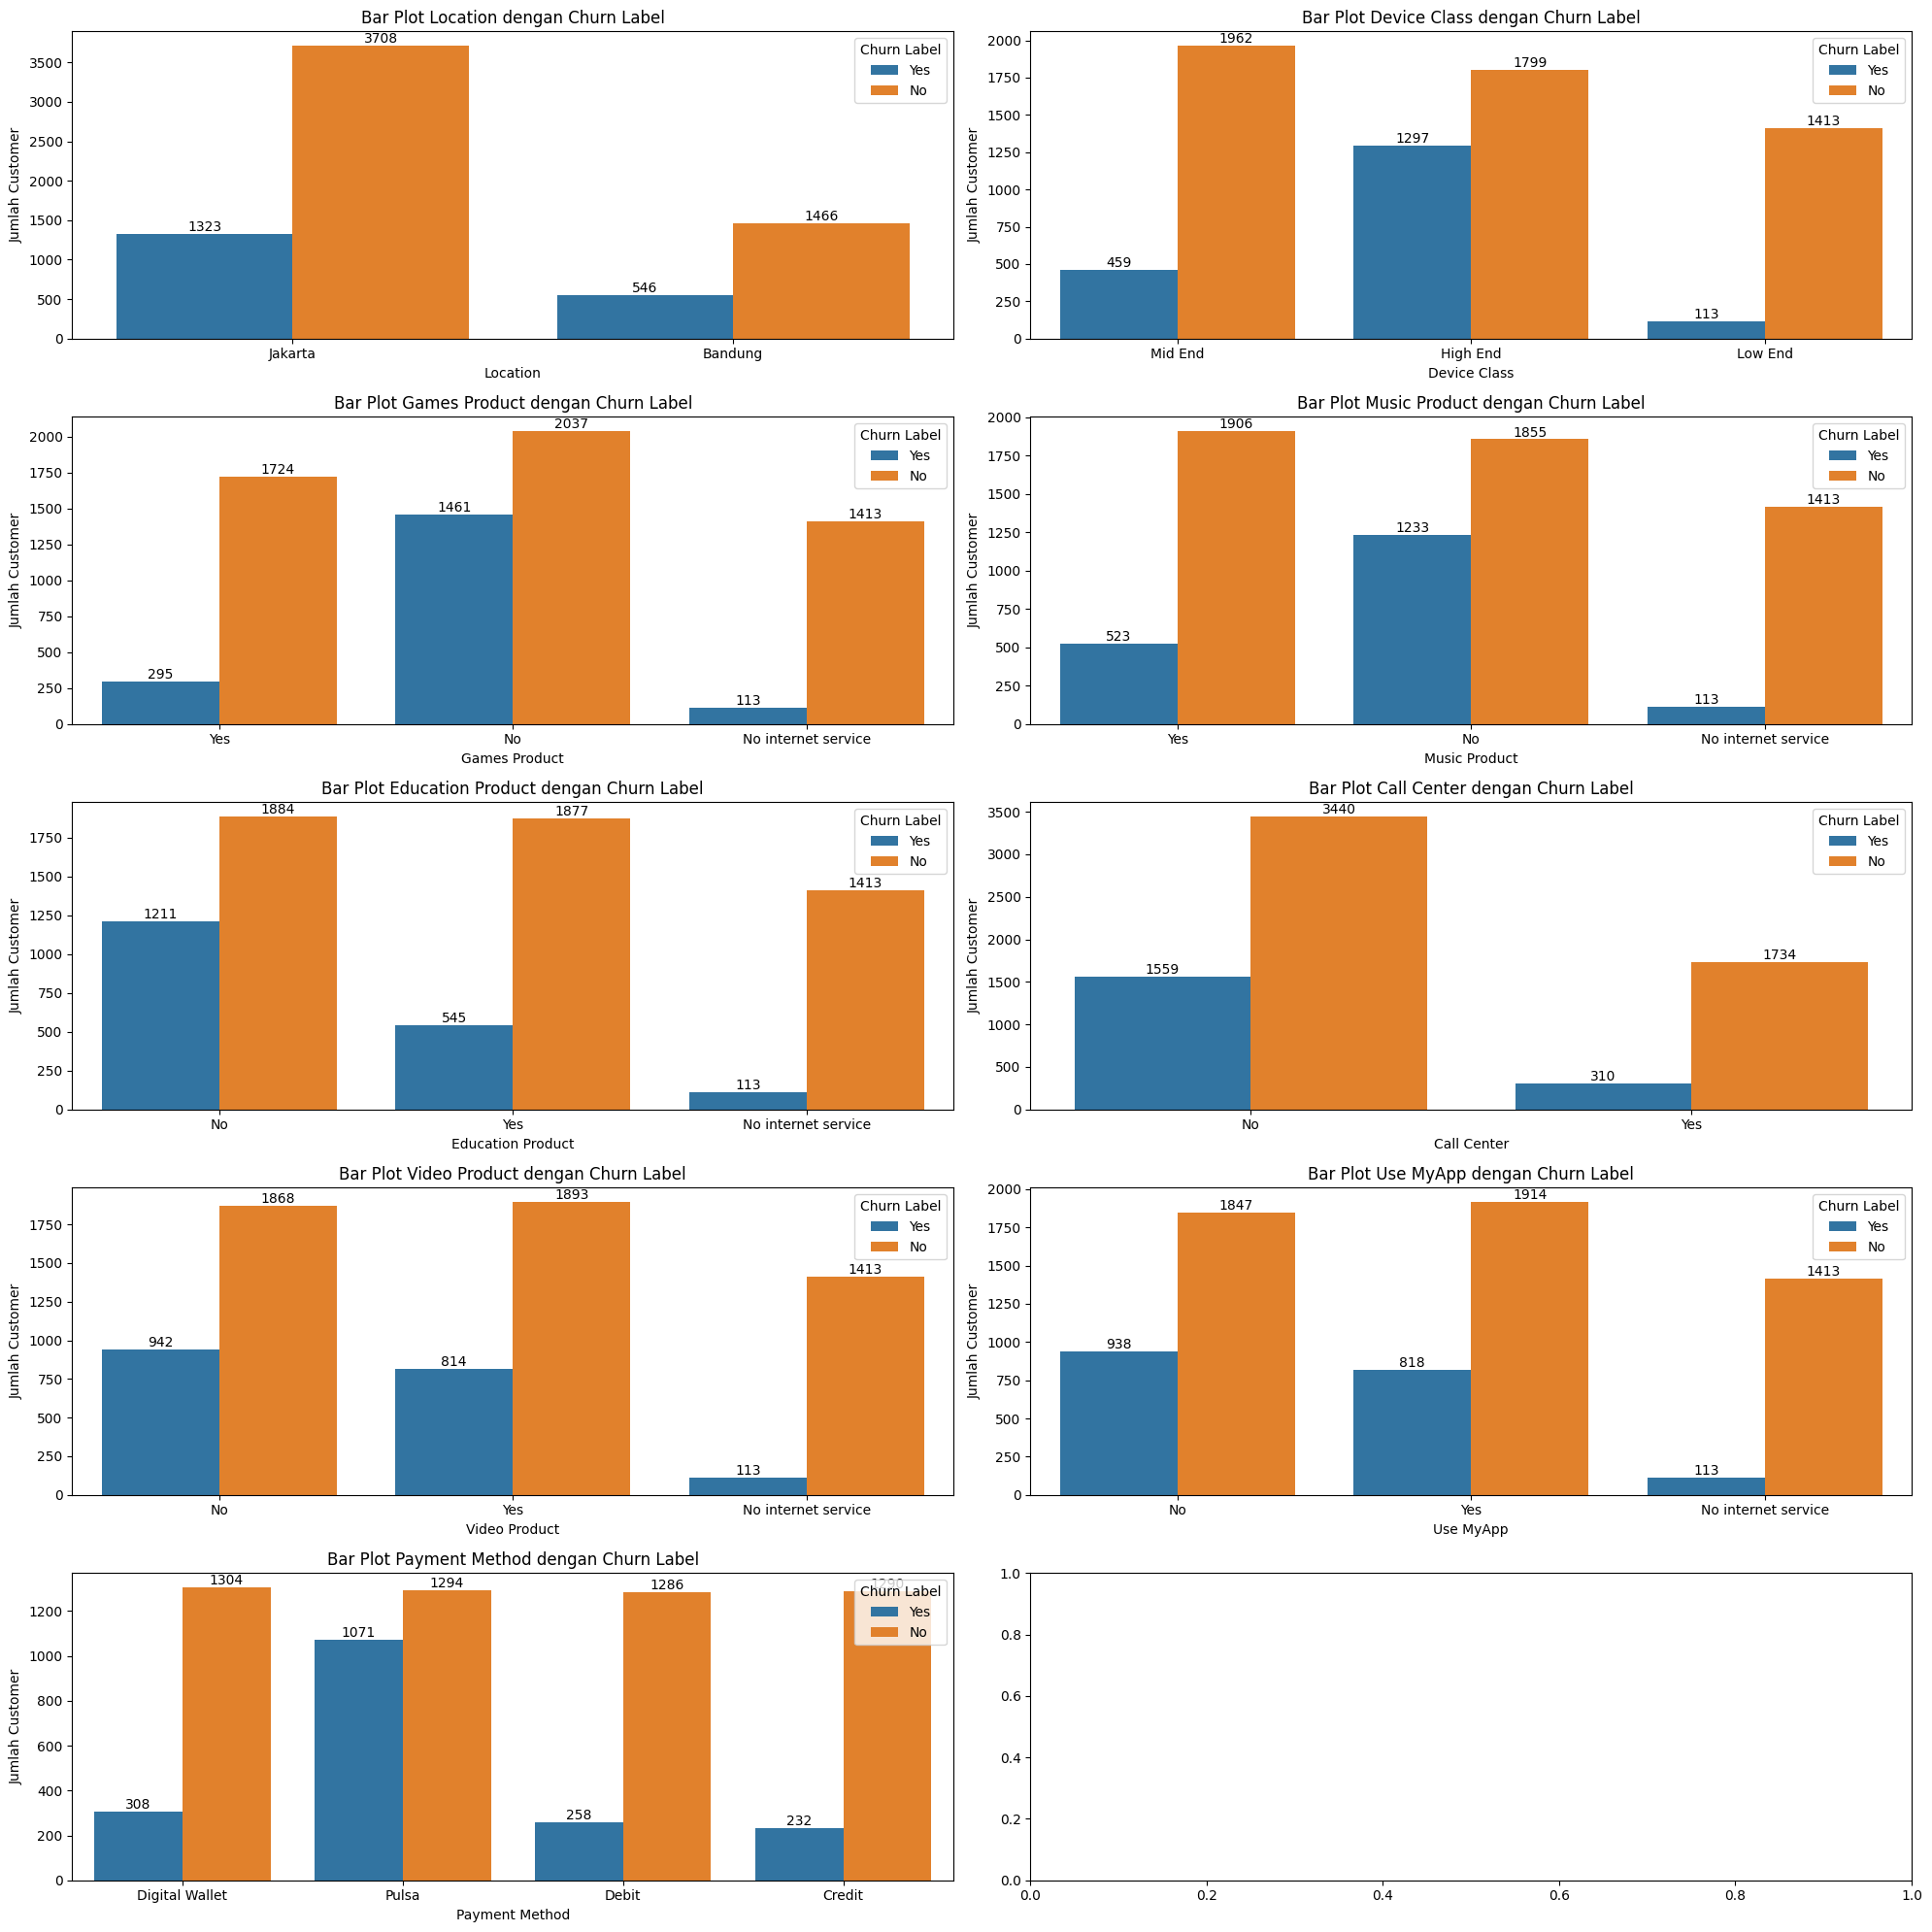

In [ ]:
kolom = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i, k in enumerate(kolom):
    sns.countplot(x=k, hue='Churn Label', data=df, ax=ax[i//2, i%2])
    for p in ax[i//2, i%2].patches:
        ax[i//2, i%2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    ax[i//2, i%2].set_title('Bar Plot ' + k + ' dengan Churn Label')
    ax[i//2, i%2].set_xlabel(k)
    ax[i//2, i%2].set_ylabel('Jumlah Customer')
    ax[i//2, i%2].legend(title='Churn Label', loc='upper right')

plt.tight_layout()
plt.show()

**Kesimpulan**

Terlihat dari grafik diatas, bahwa untuk setiap nilai dari data kategorikal. Nilai untuk atribut yang churn tidak lebih tinggi dari nilai untuk atribut yang retain.

### **Analisis atribut kategorikal untuk customer yang churn**

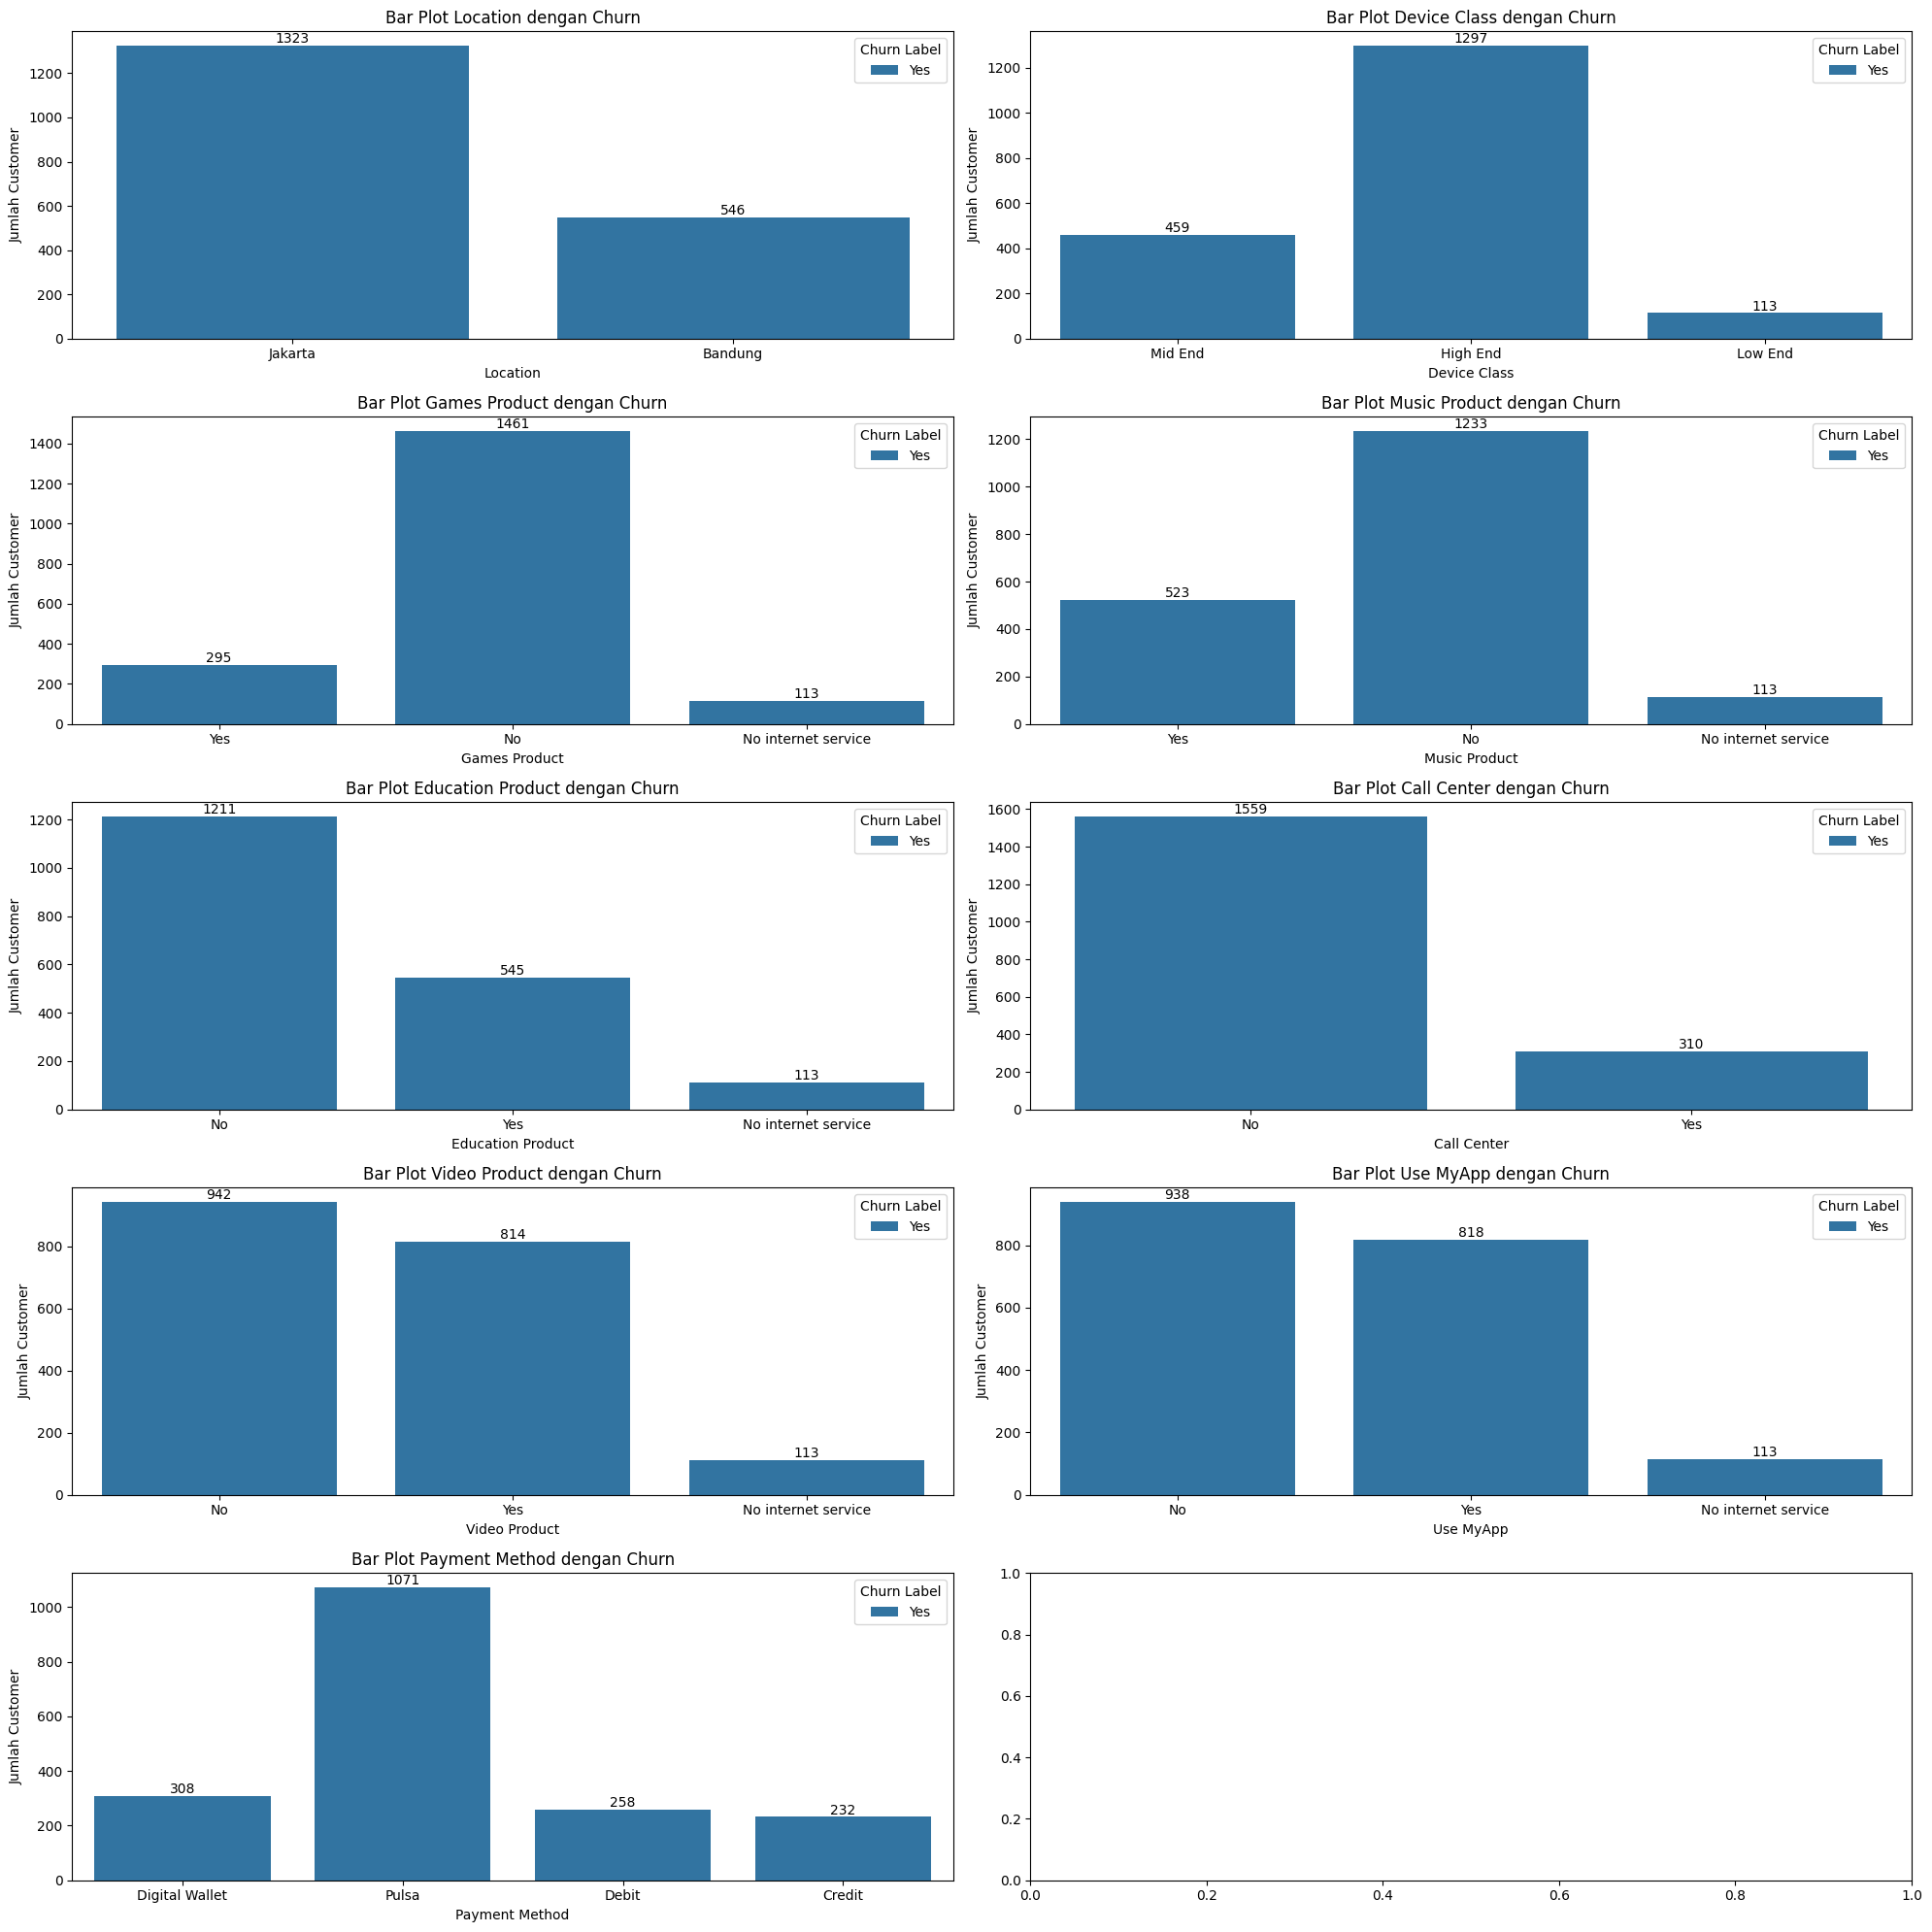

In [ ]:
kolom = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i, k in enumerate(kolom):
    sns.countplot(x=k, hue='Churn Label', data=df[df['Churn Label'] == 'Yes'], ax=ax[i//2, i%2])
    for p in ax[i//2, i%2].patches:
        ax[i//2, i%2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    ax[i//2, i%2].set_title('Bar Plot ' + k + ' dengan Churn')
    ax[i//2, i%2].set_xlabel(k)
    ax[i//2, i%2].set_ylabel('Jumlah Customer')
    ax[i//2, i%2].legend(title='Churn Label', loc='upper right')

plt.tight_layout()
plt.show()

### **Analisis atribut kategorikal untuk customer yang retain**

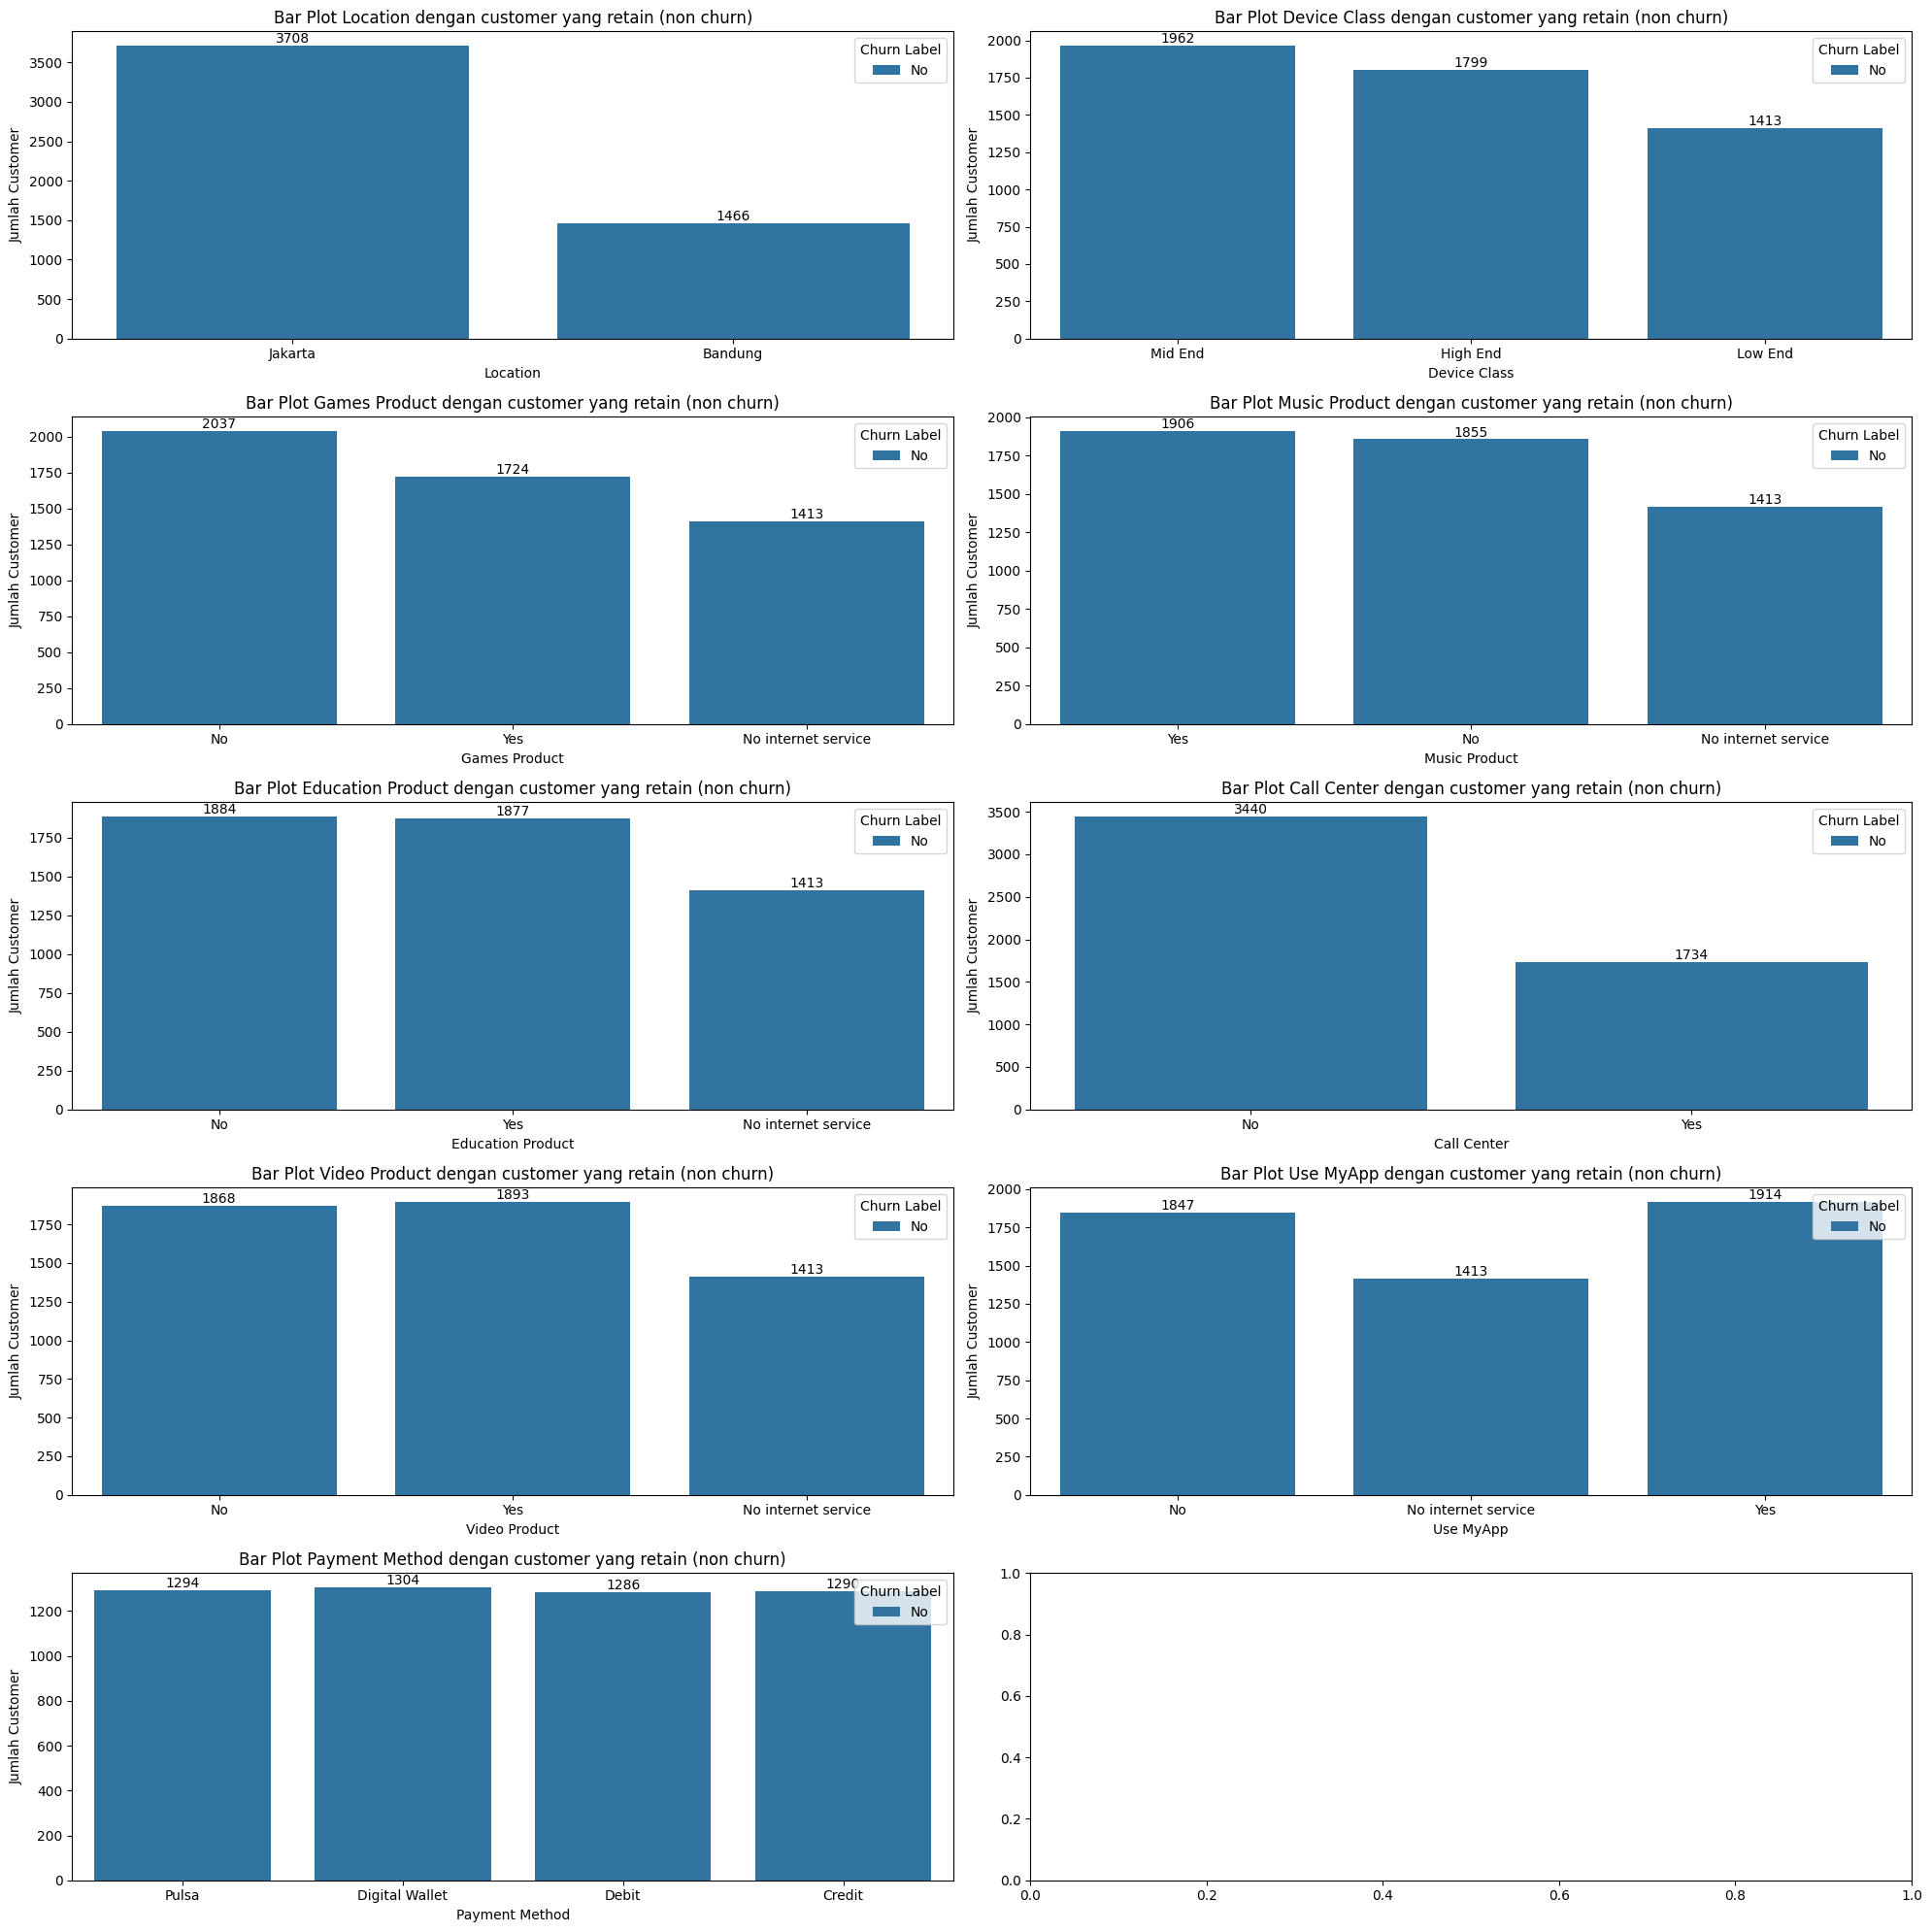

In [ ]:
kolom = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i, k in enumerate(kolom):
    sns.countplot(x=k, hue='Churn Label', data=df[df['Churn Label'] == 'No'], ax=ax[i//2, i%2])
    for p in ax[i//2, i%2].patches:
        ax[i//2, i%2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    ax[i//2, i%2].set_title('Bar Plot ' + k + ' dengan customer yang retain (non churn)')
    ax[i//2, i%2].set_xlabel(k)
    ax[i//2, i%2].set_ylabel('Jumlah Customer')
    ax[i//2, i%2].legend(title='Churn Label', loc='upper right')

plt.tight_layout()
plt.show()

### **Analisis persentase atribut kategorikal**

In [ ]:
loc_pers = df.groupby(['Location'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
loc_pers = loc_pers.pivot_table(index=['Location'], columns='Churn Label', values='Persentase').fillna(0)
loc_pers

Churn Label         No        Yes
Location                         
Bandung      72.862823  27.137177
Jakarta      73.703041  26.296959

In [ ]:
dev_pers = df.groupby(['Device Class'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
dev_pers = dev_pers.pivot_table(index=['Device Class'], columns='Churn Label', values='Persentase').fillna(0)
dev_pers

Churn Label          No        Yes
Device Class                      
High End      58.107235  41.892765
Low End       92.595020   7.404980
Mid End       81.040892  18.959108

In [ ]:
games_pers = df.groupby(['Games Product'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
games_pers = games_pers.pivot_table(index=['Games Product'], columns='Churn Label', values='Persentase').fillna(0)
games_pers

Churn Label                 No        Yes
Games Product                            
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194

In [ ]:
music_pers = df.groupby(['Music Product'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
music_pers = music_pers.pivot_table(index=['Music Product'], columns='Churn Label', values='Persentase').fillna(0)
music_pers

Churn Label                 No        Yes
Music Product                            
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494

In [ ]:
edu_pers = df.groupby(['Education Product'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
edu_pers = edu_pers.pivot_table(index=['Education Product'], columns='Churn Label', values='Persentase').fillna(0)
edu_pers

Churn Label                 No        Yes
Education Product                        
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064

In [ ]:
call_pers = df.groupby(['Call Center'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
call_pers = call_pers.pivot_table(index=['Call Center'], columns='Churn Label', values='Persentase').fillna(0)
call_pers

Churn Label         No        Yes
Call Center                      
No           68.813763  31.186237
Yes          84.833659  15.166341

In [ ]:
video_pers = df.groupby(['Video Product'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
video_pers = video_pers.pivot_table(index=['Video Product'], columns='Churn Label', values='Persentase').fillna(0)
video_pers

Churn Label                 No        Yes
Video Product                            
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188

In [ ]:
app_pers = df.groupby(['Use MyApp'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
app_pers = app_pers.pivot_table(index=['Use MyApp'], columns='Churn Label', values='Persentase').fillna(0)
app_pers

Churn Label                 No        Yes
Use MyApp                                
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435

In [ ]:
pay_pers = df.groupby(['Payment Method'])['Churn Label'].value_counts(normalize=True).mul(100).reset_index(name='Persentase')
pay_pers = pay_pers.pivot_table(index=['Payment Method'], columns='Churn Label', values='Persentase').fillna(0)
pay_pers

Churn Label            No        Yes
Payment Method                      
Credit          84.756899  15.243101
Debit           83.290155  16.709845
Digital Wallet  80.893300  19.106700
Pulsa           54.714588  45.285412

**Kesimpulan**

Kesimpulan di ambil berdasarkan pengaruh dari nilai atribut diatas 40% yang menyebabkan customer churn
1. Sebanyak 41.90% customer yang churn di kategori device class high end
2. Sebanyak 41.76% customer yang churn di kategori games product no
3. Sebanyak 45.28% customer yang churn di kategori payment method pulsa

## **Analisis atribut numerikal**

### **Analisis banyaknya customer yang churn berdasarkan lamanya pelanggan bergabung dengan perusahaan**

In [ ]:
df.sort_values(by='Tenure Months', ascending=True)['Tenure Months'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
fig = px.box(df, x='Churn Label', y='Tenure Months')
fig.update_layout(title='Box Plot Tenure Months untuk Churn Label = Yes dan Churn Label = No')
fig.show()

In [ ]:
tenure_class = df['Tenure Status'].unique()

for i in tenure_class:
    df_churn = df[df['Tenure Status'] == i]['Churn Label'].value_counts().reset_index()

    if df_churn.shape[0] == 0:
        df_churn.loc[1] = ['No', 0]
        df_churn.columns = ['Churn Label', 'Total Customer']
    else:
        df_churn.columns = ['Churn Label', 'Total Customer']

    df_churn['Tenure Status'] = i
    df_churn = df_churn[['Tenure Status', 'Churn Label', 'Total Customer']]

    if i == df['Tenure Status'].unique()[0]:
        df_churn_all = df_churn
    else:
        df_churn_all = pd.concat([df_churn_all, df_churn])

fig = px.bar(df_churn_all, x='Tenure Status', y='Total Customer', color='Churn Label', barmode='group')
fig.update_layout(title='Total Customer Churn berdasarkan Tenure Status dengan Total Customer')
fig.show()

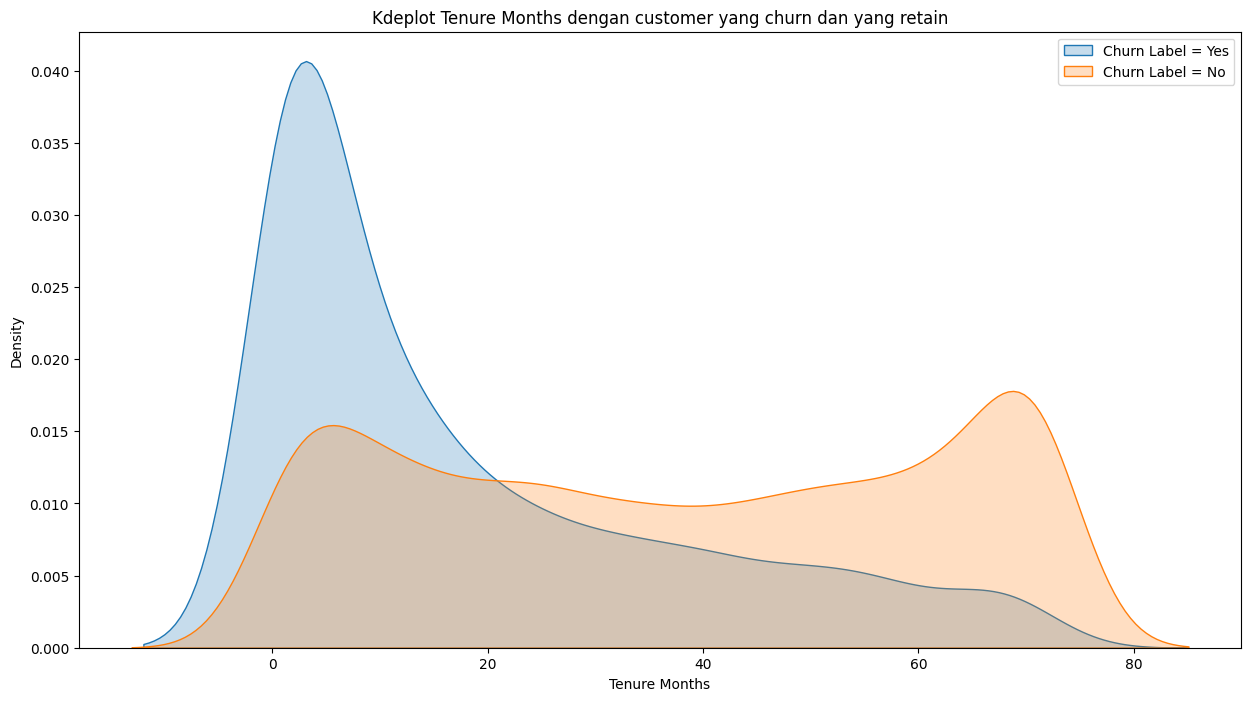

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='Tenure Months', data=df[df['Churn Label'] == 'Yes'], fill=True, label='Churn Label = Yes')
sns.kdeplot(x='Tenure Months', data=df[df['Churn Label'] == 'No'], fill=True, label='Churn Label = No')
plt.title('Kdeplot Tenure Months dengan customer yang churn dan yang retain')
plt.legend()

KDEplot di atas menggambarkan distribusi pelanggan yang melakukan churn ('Yes') dan tidak melakukan churn ('No') berdasarkan lamanya berlangganan (Tenure Months). Berikut adalah beberapa interpretasi dari plot tersebut:

1. **Churn Label 'Yes' (Pelanggan yang Berhenti Berlangganan):**
   - Puncak KDEplot cenderung tinggi pada bulan-bulan awal berlangganan, menunjukkan bahwa pelanggan memiliki kecenderungan tinggi untuk melakukan churn pada awal berlangganan.
   - Kurva kemudian menurun seiring berjalannya waktu, menunjukkan adanya penurunan jumlah pelanggan yang melakukan churn.

2. **Churn Label 'No' (Pelanggan yang Tetap Berlangganan):**
   - Puncak KDEplot juga tinggi pada bulan-bulan awal berlangganan, menandakan bahwa sejumlah besar pelanggan tetap setia pada awal berlangganan.
   - Seiring dengan waktu, kurva berfluktuasi atau tetap stabil, menunjukkan bahwa sebagian besar pelanggan yang tetap berlangganan cenderung tidak melakukan churn.


In [ ]:
for i in range(0, df['Tenure Months'].nunique()):
    df_churn = df[df['Tenure Months'] == i]['Churn Label'].value_counts().reset_index()

    if df_churn.shape[0] == 0:
        df_churn.loc[1] = ['No', 0]
        df_churn.columns = ['Churn Label', 'Total Customer']
    else:
        df_churn.columns = ['Churn Label', 'Total Customer']

    df_churn['Tenure Months'] = i
    df_churn = df_churn[['Tenure Months', 'Churn Label', 'Total Customer']]

    if i == min(df['Tenure Months'].unique()):
        df_churn_all = df_churn
    else:
        df_churn_all = pd.concat([df_churn_all, df_churn])

fig = px.line(df_churn_all, x='Tenure Months', y='Total Customer', color='Churn Label')
fig.update_layout(title='Total Customer Churn berdasarkan Tenure Months dengan Total Customer')
fig.show()

Dari grafik diatas, terlihat bahwa data dibagi berdasarkan lamanya berlangganan (Tenure Months) dan kemudian dihitung jumlah pelanggan yang melakukan churn (Churn Label 'Yes') dan tidak melakukan churn (Churn Label 'No').

Beberapa analisis yang dapat diambil:

1. **Churn Label 'Yes' (Pelanggan yang Berhenti Berlangganan):**
   - Jumlah pelanggan yang melakukan churn cenderung tinggi pada bulan-bulan awal berlangganan.
   - Terdapat variasi dalam jumlah pelanggan yang churn seiring dengan berjalannya waktu.
   - Pada beberapa bulan, jumlah pelanggan yang churn mengalami penurunan.

2. **Churn Label 'No' (Pelanggan yang Tetap Berlangganan):**
   - Jumlah pelanggan yang tetap berlangganan (tidak melakukan churn) juga cenderung tinggi pada bulan-bulan awal berlangganan.
   - Seiring dengan waktu, terlihat bahwa jumlah pelanggan yang tetap berlangganan memiliki tren yang stabil atau mengalami penurunan.

Grafik atau visualisasi dari data ini dapat memberikan gambaran yang lebih jelas terkait dengan tren churn pelanggan seiring dengan lamanya berlangganan.

Kesimpulan yang dapat ditarik dari hasil analisis tersebut adalah, bahwa ada hubungan negatif antara Tenure Months dan Churn Label, yaitu semakin pendek lama berlangganan layanan, semakin besar kemungkinan pelanggan untuk berhenti menggunakan layanan. Hal ini dapat menunjukkan bahwa pelanggan yang baru berlangganan layanan mungkin belum merasa puas atau mendapatkan manfaat dari layanan, atau mungkin ada faktor eksternal yang lain, yang akan di analisis pada tahap selanjutnya.

### **Analisis banyaknya pelanggan yang churn berdasarkan pengeluaran bulanan pelanggan**

In [ ]:
fig = px.bar(df_monthly_purchase, x='Monthly Purchase Category', y='Total Customer', text='Total Customer')
fig.update_layout(title='Banyaknya Customer Berdasarkan Monthly Purchase Category')
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
fig = px.box(df, x='Churn Label', y='Monthly Purchase')
fig.update_layout(title='Box Plot Monthly Purchase untuk Churn Label = Yes dan Churn Label = No')
fig.show()

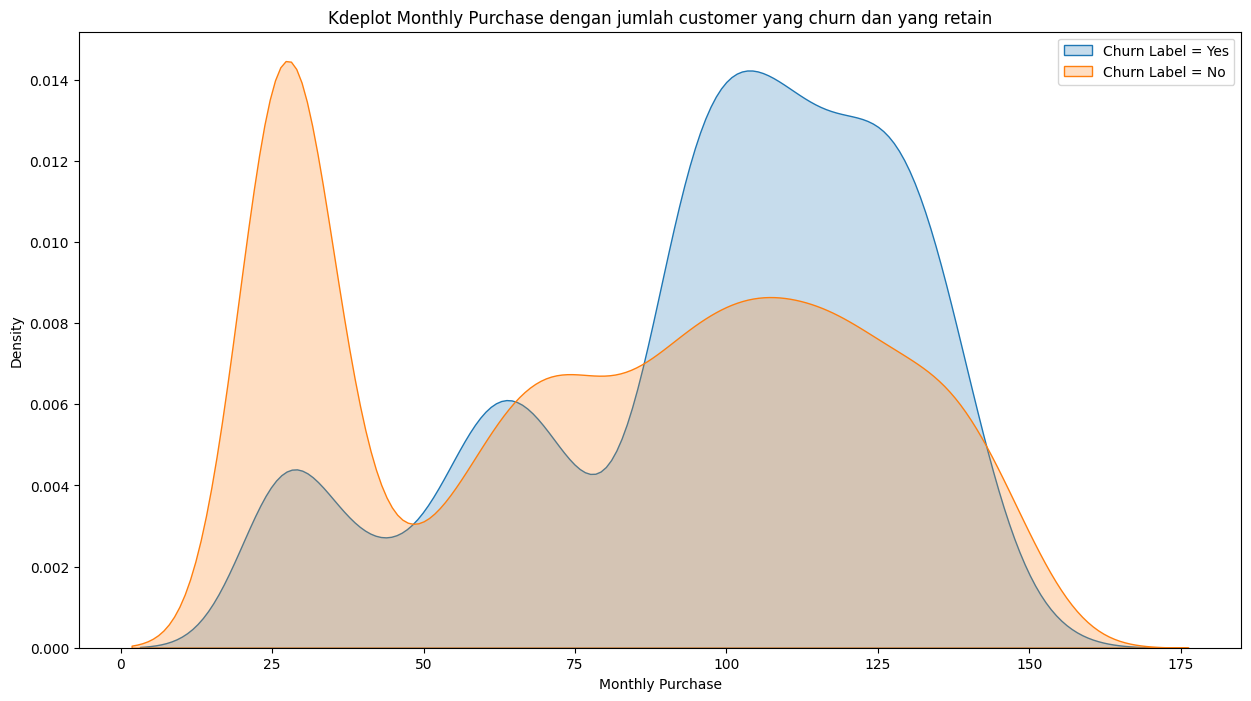

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='Monthly Purchase', data=df[df['Churn Label'] == 'Yes'], fill=True, label='Churn Label = Yes')
sns.kdeplot(x='Monthly Purchase', data=df[df['Churn Label'] == 'No'], fill=True, label='Churn Label = No')
plt.title('Kdeplot Monthly Purchase dengan jumlah customer yang churn dan yang retain')
plt.legend()

In [ ]:
monthly_class = df['Monthly Purchase Category'].unique()

for i in monthly_class:
    df_churn = df[df['Monthly Purchase Category'] == i]['Churn Label'].value_counts().reset_index()

    if df_churn.shape[0] == 0:
        df_churn.loc[1] = ['No', 0]
        df_churn.columns = ['Churn Label', 'Total Customer']
    else:
        df_churn.columns = ['Churn Label', 'Total Customer']

    df_churn['Monthly Purchase Category'] = i
    df_churn = df_churn[['Monthly Purchase Category', 'Churn Label', 'Total Customer']]

    if i == df['Monthly Purchase Category'].unique()[0]:
        df_churn_all = df_churn
    else:
        df_churn_all = pd.concat([df_churn_all, df_churn])

fig = px.bar(df_churn_all, x='Monthly Purchase Category', y='Total Customer', color='Churn Label', barmode='group')
fig.update_layout(title='Total Customer Churn berdasarkan Monthly Purchase Category dengan Total Customer')
fig.show()

### **Analisis banyaknya pelanggan yang churn berdasarkan CLTV (Revisi)**

In [ ]:
fig = px.bar(df_cltv, x='CLTV Category', y='Total Customer', text='Total Customer')
fig.update_layout(title='Banyaknya Customer Berdasarkan Monthly Purchase Category')
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
fig = px.box(df, x='Churn Label', y='CLTV')
fig.update_layout(title='Box Plot CLTV untuk Churn Label = Yes dan Churn Label = No')
fig.show()

In [ ]:
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(df).mark_point(clip=True).transform_density(
    'CLTV',
    as_=['CLTV (Predicted Thou. IDR)', 'density'],
    groupby=['Churn Label'],
    extent=[0,10000]
    ).mark_area(
        opacity=0.5
    ).encode(
        x=alt.X('CLTV (Predicted Thou. IDR):Q'),
        y='density:Q',
        color='Churn Label:N'
    ).properties(
        width=400
    )

alt.Chart(...)

In [ ]:
cltv_class = df['CLTV Category'].unique()

for i in cltv_class:
    df_churn = df[df['CLTV Category'] == i]['Churn Label'].value_counts().reset_index()

    if df_churn.shape[0] == 0:
        df_churn.loc[1] = ['No', 0]
        df_churn.columns = ['Churn Label', 'Total Customer']
    else:
        df_churn.columns = ['Churn Label', 'Total Customer']

    df_churn['CLTV Category'] = i
    df_churn = df_churn[['CLTV Category', 'Churn Label', 'Total Customer']]

    if i == df['CLTV Category'].unique()[0]:
        df_churn_all = df_churn
    else:
        df_churn_all = pd.concat([df_churn_all, df_churn])

fig = px.bar(df_churn_all, x='CLTV Category', y='Total Customer', color='Churn Label', barmode='group')
fig.update_layout(title='Total Customer Churn berdasarkan CLTV Category dengan Total Customer')
fig.show()

## **Analisis kombinasi layanan yang digunakan dengan tenure months**

### **Analisis banyaknya customer yang churn dan retain berdasarkan layanan call center dengan lamanya pelanggan bergabung dengan perusahaan**

In [ ]:
# Churn customer
pivot_yes_tenure_call_center = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Call Center',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_call_center.index, y=pivot_yes_tenure_call_center['No']),
    go.Line(name='Yes', x=pivot_yes_tenure_call_center.index, y=pivot_yes_tenure_call_center['Yes'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer churn berdasarkan Tenure Months dan Call Center'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi Tenure Months dan penggunaan layanan Call Center ('Yes' atau 'No').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Pada bulan-bulan awal, terlihat bahwa jumlah pelanggan yang berhenti berlangganan cenderung lebih tinggi.
   - Pada bulan-bulan lebih lanjut, jumlahnya cenderung berkurang, menunjukkan bahwa pelanggan yang bertahan lebih lama memiliki kecenderungan lebih rendah untuk berhenti berlangganan.

2. **Penggunaan Layanan Call Center:**
   - Pada umumnya, pelanggan yang tidak menggunakan layanan Call Center ('No') memiliki jumlah berhenti berlangganan yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan ('Yes').
   - Ada beberapa pengecualian di mana jumlah pelanggan yang berhenti berlangganan tetap tinggi meskipun menggunakan layanan Call Center.

In [ ]:
# Retain customer
pivot_no_tenure_call_center = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Call Center',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_call_center.index, y=pivot_no_tenure_call_center['No']),
    go.Line(name='Yes', x=pivot_no_tenure_call_center.index, y=pivot_no_tenure_call_center['Yes'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer retain berdasarkan Tenure Months dan Call Center'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi Tenure Months dan penggunaan layanan Call Center ('Yes' atau 'No').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Jumlah pelanggan yang tetap berlangganan meningkat seiring dengan peningkatan durasi berlangganan (Tenure Months).
   - Pada bulan-bulan awal, terlihat bahwa jumlah pelanggan yang tetap berlangganan cenderung lebih rendah, tetapi meningkat pada bulan-bulan berikutnya.

2. **Penggunaan Layanan Call Center:**
   - Mayoritas pelanggan yang tetap berlangganan menggunakan layanan Call Center ('Yes').
   - Seiring dengan durasi berlangganan yang meningkat, jumlah pelanggan yang tetap berlangganan dengan menggunakan layanan Call Center juga meningkat.

### **Analisis banyaknya customer yang churn dan retain berdasarkan layanan Use MyApp dengan lamanya pelanggan bergabung dengan perusahaan**

In [ ]:
# Churn customer
pivot_yes_tenure_use_myapp = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                                            index='Tenure Months',
                                            columns='Use MyApp',
                                            values='Customer ID',
                                            aggfunc='count',
                                            fill_value=0)

data = [
    go.Line(name='No', x=pivot_yes_tenure_use_myapp.index, y=pivot_yes_tenure_use_myapp['No']),
    go.Line(name='No internet service', x=pivot_yes_tenure_use_myapp.index, y=pivot_yes_tenure_use_myapp['No internet service']),
    go.Line(name='Yes', x=pivot_yes_tenure_use_myapp.index, y=pivot_yes_tenure_use_myapp['Yes'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Churn berdasarkan Tenure Months dan Use MyApp'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi Tenure Months dan penggunaan layanan "MyApp" (Use MyApp 'Yes', 'No', atau 'No internet service').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Jumlah pelanggan yang berhenti berlangganan (Churn) menurun seiring dengan peningkatan durasi berlangganan (Tenure Months). Ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin rendah kemungkinan mereka untuk berhenti berlangganan.

2. **Penggunaan Layanan "MyApp":**
   - Mayoritas pelanggan yang berhenti berlangganan (Churn) menggunakan layanan "MyApp" (Use MyApp 'Yes' atau 'No').
   - Pelanggan yang tidak menggunakan layanan internet (Use MyApp 'No internet service') memiliki jumlah yang lebih rendah dalam kelompok Churn.

3. **Dampak Durasi Berlangganan:**
   - Jumlah pelanggan yang berhenti berlangganan cenderung menurun seiring berjalannya waktu pada semua penggunaan layanan MyApp.


In [ ]:
# Retain customer
pivot_no_tenure_use_myapp = pd.pivot_table(df[df['Churn Label'] == 'No'],
                                            index='Tenure Months',
                                            columns='Use MyApp',
                                            values='Customer ID',
                                            aggfunc='count',
                                            fill_value=0)

data = [
    go.Line(name='No', x=pivot_no_tenure_use_myapp.index, y=pivot_no_tenure_use_myapp['No']),
    go.Line(name='No internet service', x=pivot_no_tenure_use_myapp.index, y=pivot_no_tenure_use_myapp['No internet service']),
    go.Line(name='Yes', x=pivot_no_tenure_use_myapp.index, y=pivot_no_tenure_use_myapp['Yes'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Customer Retain berdasarkan Tenure Months dan Use MyApp'
)

fig = go.Figure(data=data, layout=layout)
# fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi Tenure Months dan penggunaan layanan "MyApp" (Use MyApp 'Yes', 'No', atau 'No internet service').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Sebagian besar pelanggan yang tetap berlangganan (Churn 'No') memiliki Tenure Months dalam kisaran 1 hingga 12 bulan. Jumlah pelanggan tersebut lebih tinggi pada Tenure Months awal dan cenderung menurun seiring berjalannya waktu.

2. **Penggunaan Layanan "MyApp":**
   - Mayoritas pelanggan yang tetap berlangganan (Churn 'No') menggunakan layanan "MyApp" (Use MyApp 'Yes' atau 'No').
   - Penggunaan layanan "MyApp" 'No' adalah yang paling umum, tetapi penggunaan 'Yes' juga cukup signifikan.

## **Analisis perangkat milik pelanggan dengan tenure months**

### **Analisis banyaknya customer yang churn dan retain berdasarkan perangkat milik pelanggan dengan lamanya pelanggan bergabung dengan perusahaan**

In [ ]:
# Churn customer
pivot_yes_tenure_device = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                       index='Tenure Months',
                       columns='Device Class',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='Low End', x=pivot_yes_tenure_device.index, y=pivot_yes_tenure_device['Low End']),
    go.Line(name='Mid End', x=pivot_yes_tenure_device.index, y=pivot_yes_tenure_device['Mid End']),
    go.Line(name='High End', x=pivot_yes_tenure_device.index, y=pivot_yes_tenure_device['High End'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Churn Customer berdasarkan Tenure Months dan Device Class'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi Tenure Months dan kelas perangkat yang digunakan (Device Class: 'High End', 'Low End', 'Mid End').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Mayoritas pelanggan yang berhenti berlangganan (Churn 'Yes') memiliki Tenure Months dalam kisaran 1 hingga 15 bulan. Jumlah pelanggan tersebut lebih tinggi pada Tenure Months awal dan cenderung menurun seiring berjalannya waktu.

2. **Kelas Perangkat:**
   - Kelas perangkat "Low End" memiliki jumlah pelanggan yang berhenti berlangganan lebih rendah dibandingkan dengan "High End" dan "Mid End".
   - Kelas perangkat "High End" memiliki jumlah pelanggan yang berhenti berlangganan tertinggi, sementara "Mid End" berada di tengah.

3. **Dampak Durasi Berlangganan:**
   - Jumlah pelanggan yang berhenti berlangganan cenderung menurun seiring berjalannya waktu pada semua kelas perangkat.


In [ ]:
# Retain customer
pivot_no_tenure_device = pd.pivot_table(df[df['Churn Label'] == 'No'],
                       index='Tenure Months',
                       columns='Device Class',
                       values='Customer ID',
                       aggfunc='count',
                       fill_value=0)

data = [
    go.Line(name='Low End', x=pivot_no_tenure_device.index, y=pivot_no_tenure_device['Low End']),
    go.Line(name='Mid End', x=pivot_no_tenure_device.index, y=pivot_no_tenure_device['Mid End']),
    go.Line(name='High End', x=pivot_no_tenure_device.index, y=pivot_no_tenure_device['High End'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Retain Customer berdasarkan Tenure Months dan Device Class'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode='stack')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi Tenure Months dan kelas perangkat yang digunakan (Device Class: 'High End', 'Low End', 'Mid End').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Jumlah pelanggan yang tetap berlangganan (Churn 'No') terdistribusi secara merata pada berbagai Tenure Months, dengan peningkatan seiring berjalannya waktu. Ini menunjukkan bahwa sejumlah besar pelanggan cenderung bertahan dalam jangka panjang.

2. **Kelas Perangkat:**
   - Kelas perangkat "Low End" memiliki jumlah pelanggan yang tetap berlangganan paling rendah dibandingkan dengan "High End" dan "Mid End".
   - Kelas perangkat "Mid End" memiliki jumlah pelanggan yang tetap berlangganan tertinggi pada banyak Tenure Months.



## **Analisis jenis pembayaran pelanggan dengan tenure months**

### **Analisis banyaknya customer yang churn dan retain berdasarkan jenis pembayaran pelanggan dengan lamanya pelanggan bergabung dengan perusahaan**

In [ ]:
# Churn customer
pivot_yes_tenure_payment = pd.pivot_table(df[df['Churn Label'] == 'Yes'],
                                            index='Tenure Months',
                                            columns='Payment Method',
                                            values='Customer ID',
                                            aggfunc='count',
                                            fill_value=0)

data = [
    go.Bar(name='Credit', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Credit']),
    go.Bar(name='Debit', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Debit']),
    go.Bar(name='Digital Wallet', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Digital Wallet']),
    go.Bar(name='Pulsa', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Pulsa'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Churn Customer berdasarkan Tenure Months dan Payment Method'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode='stack')
fig.show()

Grafik di atas menunjukkan jumlah pelanggan yang berhenti berlangganan (Churn Label 'Yes') berdasarkan kombinasi Tenure Months dan metode pembayaran yang digunakan (Payment Method: 'Credit', 'Debit', 'Digital Wallet', 'Pulsa').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Mayoritas pelanggan yang berhenti berlangganan (Churn 'Yes') memiliki Tenure Months dalam kisaran 1 hingga 22. Jumlah pelanggan tersebut lebih tinggi pada Tenure Months awal dan cenderung menurun seiring berjalannya waktu.

2. **Metode Pembayaran:**
   - Jumlah pelanggan yang berhenti berlangganan bervariasi berdasarkan metode pembayaran.
   - Metode pembayaran "Credit" dan "Debit" memiliki jumlah pelanggan yang lebih kecil dibandingkan dengan "Digital Wallet" dan "Pulsa" pada beberapa Tenure Months tertentu.

3. **Dampak Durasi Berlangganan:**
   - Jumlah pelanggan yang berhenti berlangganan cenderung menurun seiring berjalannya waktu pada semua jenis pembayaran pelanggan.

In [ ]:
# Retain customer
pivot_yes_tenure_payment = pd.pivot_table(df[df['Churn Label'] == 'No'],
                                            index='Tenure Months',
                                            columns='Payment Method',
                                            values='Customer ID',
                                            aggfunc='count',
                                            fill_value=0)

data = [
    go.Bar(name='Credit', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Credit']),
    go.Bar(name='Debit', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Debit']),
    go.Bar(name='Digital Wallet', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Digital Wallet']),
    go.Bar(name='Pulsa', x=pivot_yes_tenure_payment.index, y=pivot_yes_tenure_payment['Pulsa'])
]

layout = go.Layout(
    xaxis=dict(title='Tenure Months'),
    yaxis=dict(title='Total Customer'),
    title='Total Retain Customer berdasarkan Tenure Months dan Payment Method'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode='stack')
fig.show()

Grafik di atas menunjukkan jumlah pelanggan yang tetap berlangganan (Churn Label 'No') berdasarkan kombinasi Tenure Months dan metode pembayaran yang digunakan (Payment Method: 'Credit', 'Debit', 'Digital Wallet', 'Pulsa').

Beberapa temuan potensial dari tabel ini:

1. **Durasi Berlangganan:**
   - Jumlah pelanggan yang tetap berlangganan (Churn 'No') juga terdistribusi secara merata pada berbagai Tenure Months, meskipun ada fluktuasi selama periode tersebut.

2. **Metode Pembayaran:**
   - Jumlah pelanggan yang tetap berlangganan bervariasi berdasarkan metode pembayaran yang digunakan.
   - Metode pembayaran "Digital Wallet" memiliki jumlah pelanggan yang lebih tinggi dibandingkan dengan metode pembayaran lainnya, terutama pada Tenure Months tertentu.

## **Analisis distribusi kombinasi layanan berdasarkan pengeluaran bulanan pelanggan**

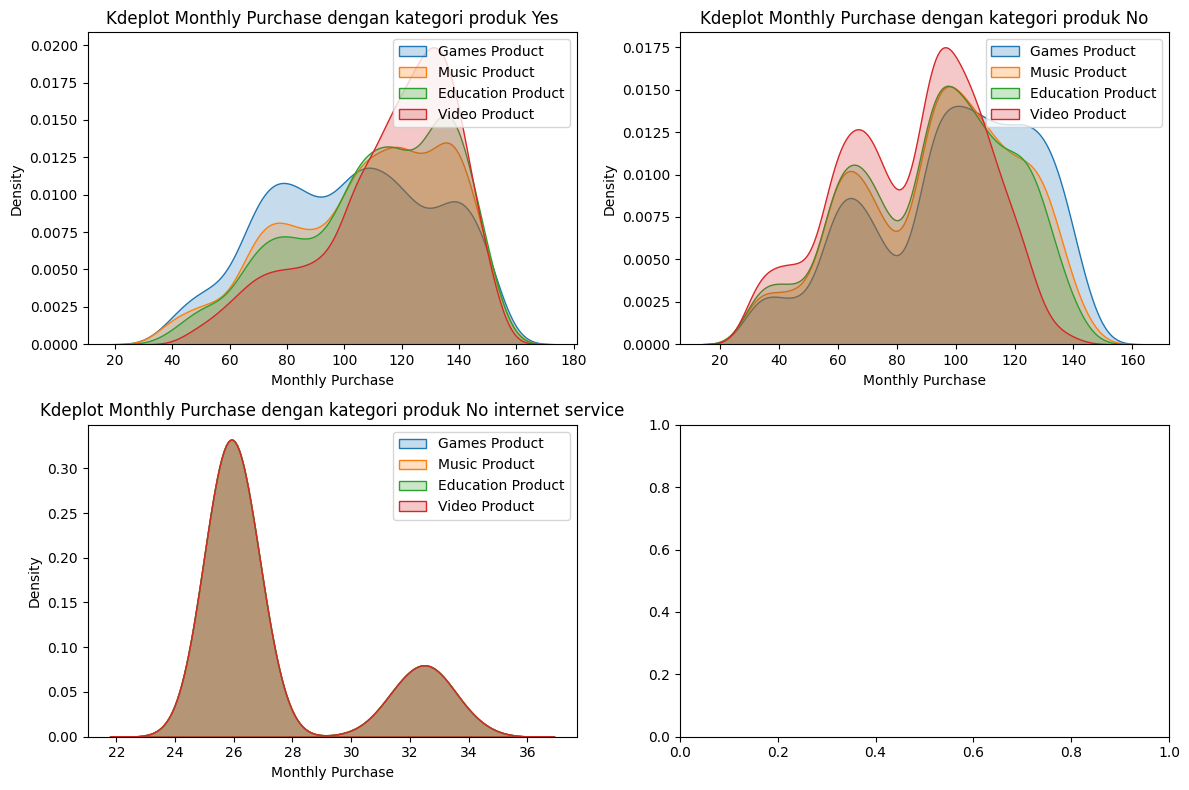

In [ ]:
kolom = ['Games Product', 'Music Product', 'Education Product', 'Video Product']
kategories = ['Yes', 'No', 'No internet service']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, kategori in enumerate(kategories):
    row, col = divmod(i, 2)
    for product in kolom:
        sns.kdeplot(x='Monthly Purchase', data=df[df[product] == kategori], fill=True, label=product, ax=ax[row, col])
        ax[row, col].set_title(f'Kdeplot Monthly Purchase dengan kategori produk {kategori}')
        ax[row, col].legend()

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwa pengguna yang pembelian bulanannya menengah hingga tinggi banyak yang memakai produk video, disusul oleh produk edukasi, produk musik, dan produk game. Sedangkan banyak customer dengan pembelian bulanan yang rendah sama sekali tidak memakai semua produk tersebut lantaran tidak ada layanan internet.

## **Analisis distribusi perangkat milik pelanggan berdasarkan pengeluaran bulanan pelanggan**

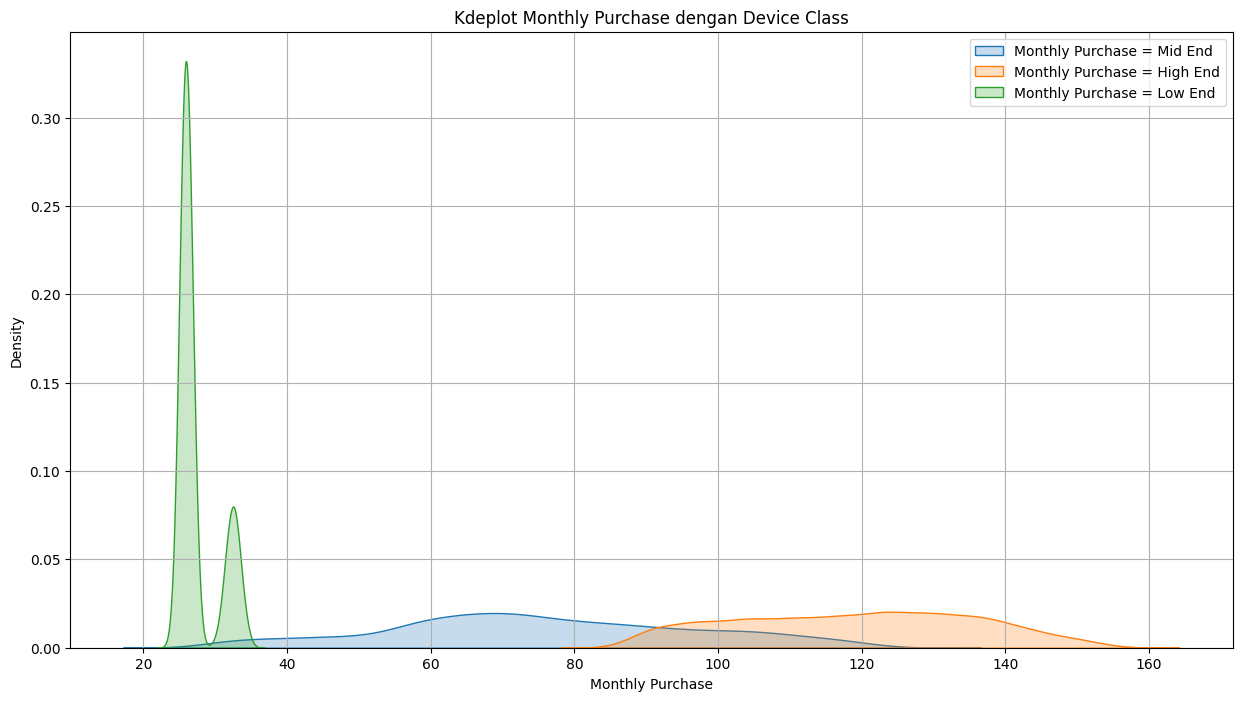

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='Monthly Purchase', data=df[df['Device Class'] == df['Device Class'].unique()[0]], fill=True, label=f"Monthly Purchase = {df['Device Class'].unique()[0]}")
sns.kdeplot(x='Monthly Purchase', data=df[df['Device Class'] == df['Device Class'].unique()[1]], fill=True, label=f"Monthly Purchase = {df['Device Class'].unique()[1]}")
sns.kdeplot(x='Monthly Purchase', data=df[df['Device Class'] == df['Device Class'].unique()[2]], fill=True, label=f"Monthly Purchase = {df['Device Class'].unique()[2]}")
plt.title('Kdeplot Monthly Purchase dengan Device Class')
plt.grid()
plt.legend()

Berdasarkan visualisasi di atas, dapat diketahui bahwa terdapat korelasi antara device class milik customer dengan pembelian bulanan. Terlihat bahwa pengguna yang memiliki device class low end memiliki pembelian bulanan yang rendah, yaitu berkisar antara 20 - 36 ribu dengan rata-rata pemilik device low end banyak yang memiliki pembelian bulanan sekitar 25 ribu.

Berbeda dengan device class low end, customer yang memiliki device mid end dan high end lebih bervariasi pembelian bulannya dengan pembelian bulanan customer high end lebih besar daripada pembelian bulanan customer mid end.

Customer yang memiliki device mid end memiliki pembelian bulanan yang bervariasi dengan rentangnya mulai dari 25 - 125 ribu, sedangkan customer yang memiliki device high end memiliki pembelian bulanan dengan rentangnya mulai dari 80 ribu - 160 ribu.

Berdasarkan analisis di atas, dapat disimpulkan bahwa semakin bagus device customer, maka semakin tinggi pembelian bulanannya.

## **Analisis distribusi jenis pembayaran pelanggan berdasarkan pengeluaran bulanan pelanggan**

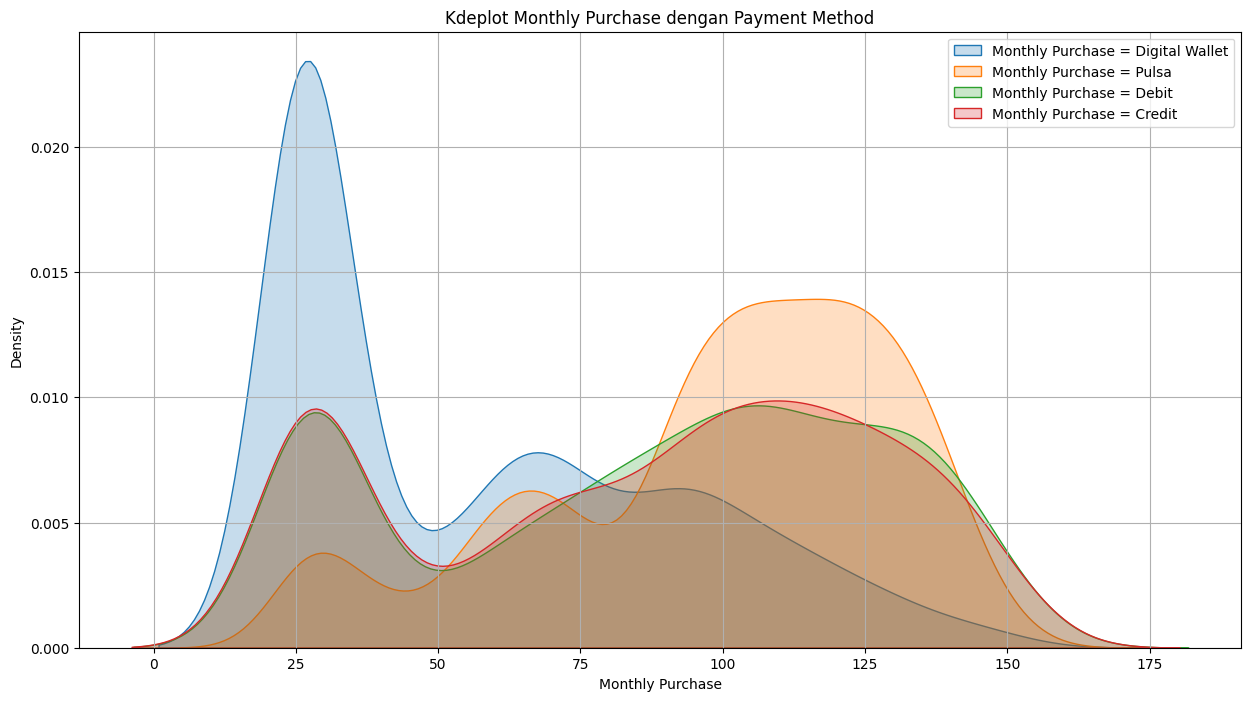

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='Monthly Purchase', data=df[df['Payment Method'] == df['Payment Method'].unique()[0]], fill=True, label=f"Monthly Purchase = {df['Payment Method'].unique()[0]}")
sns.kdeplot(x='Monthly Purchase', data=df[df['Payment Method'] == df['Payment Method'].unique()[1]], fill=True, label=f"Monthly Purchase = {df['Payment Method'].unique()[1]}")
sns.kdeplot(x='Monthly Purchase', data=df[df['Payment Method'] == df['Payment Method'].unique()[2]], fill=True, label=f"Monthly Purchase = {df['Payment Method'].unique()[2]}")
sns.kdeplot(x='Monthly Purchase', data=df[df['Payment Method'] == df['Payment Method'].unique()[3]], fill=True, label=f"Monthly Purchase = {df['Payment Method'].unique()[3]}")
plt.title('Kdeplot Monthly Purchase dengan Payment Method')
plt.grid()
plt.legend()

Berdasarkan visualisasi di atas, dapat diketahui bahwa terdapat perbedaan pembelian bulanan customer berdasarkan metode pembayarannya. Dapat diketahui bahwa customer yang pembelian bulanannya rendah banyak menggunakan digital wallet sebagai metode pembayarannya, banyak customer yang pembelian bulanannya sebanyak 27 ribu menggunakan metode pembayaran digital wallet. Walaupun begitu, tetap ada beberapa customer yang pembelian bulanannya lebih tinggi dan tetap menggunakan digital wallet sebagai metode pembayaran walaupun jumlahnya tidak banyak dan jumlah customernya menurun seiring bertambahnya pembelian bulanan.

Sebaliknya, customer yang memiliki pembelian bulanan yang tinggi lebih memilih menggunakan metode pembayaran pulsa, debit, serta kredit dengan yang paling banyak terpakai untuk customer pembelian bulanan tinggi adalah pulsa. Dapat diketahui bahwa, banyak customer yang pembelian bulanannya sekitar 80 ribu - 150 ribu memilih pulsa sebagai metode pembayaran. Walaupun begitu, tetap ada beberapa customer yang pembelian bulanannya lebih rendah dan tetap menggunakan pulsa sebagai metode pembayaran walaupun jumlahnya tidak banyak dan jumlah customernya menurun seiring berkurangnya pembelian bulanan. Lalu, penggunaan debit dan kredit banyak digunakan untuk customer yang pembelian bulanannya rendah maupun tinggi tetapi sedikit digunakan untuk customer yang pembelian bulanannya sedang.

## **Analisis distribusi kombinasi layanan berdasarkan CLTV**

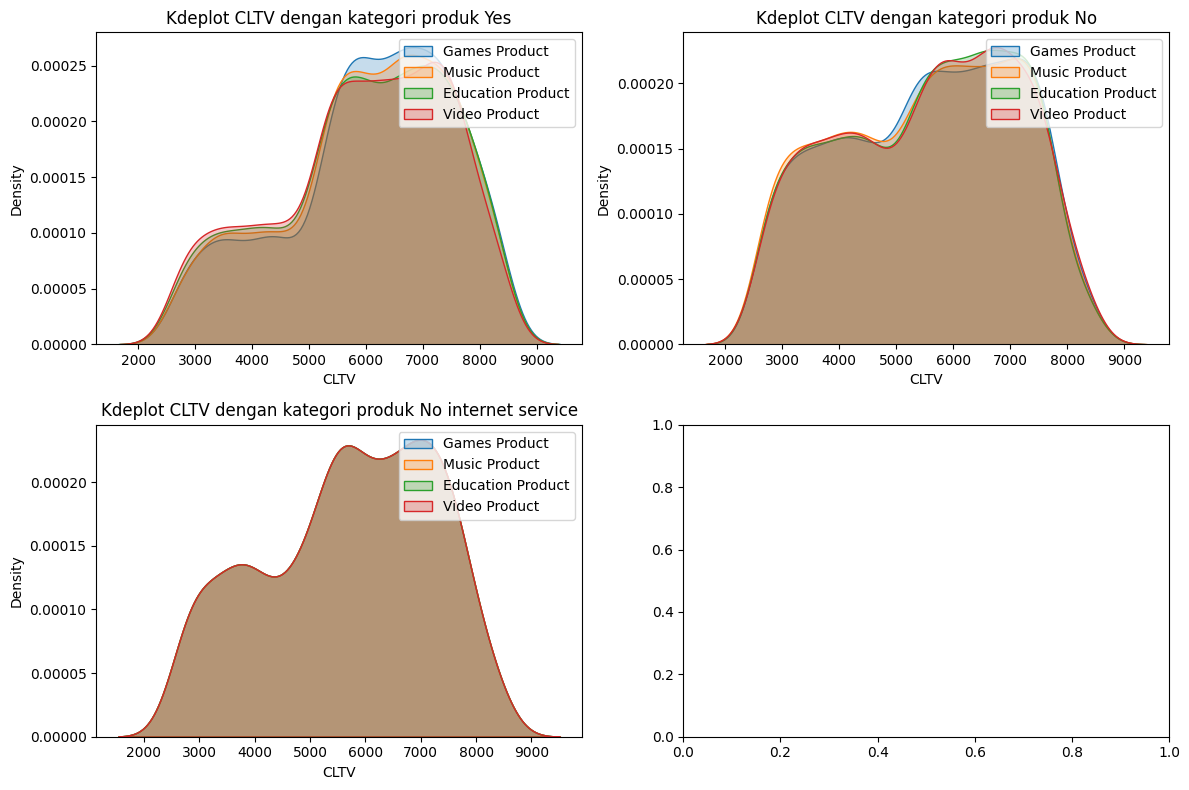

In [ ]:
kolom = ['Games Product', 'Music Product', 'Education Product', 'Video Product']
kategories = ['Yes', 'No', 'No internet service']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, kategori in enumerate(kategories):
    row, col = divmod(i, 2)
    for product in kolom:
        sns.kdeplot(x='CLTV', data=df[df[product] == kategori], fill=True, label=product, ax=ax[row, col])
        ax[row, col].set_title(f'Kdeplot CLTV dengan kategori produk {kategori}')
        ax[row, col].legend()

plt.tight_layout()
plt.show()

## **Analisis distribusi perangkat milik pelanggan berdasarkan CLTV**

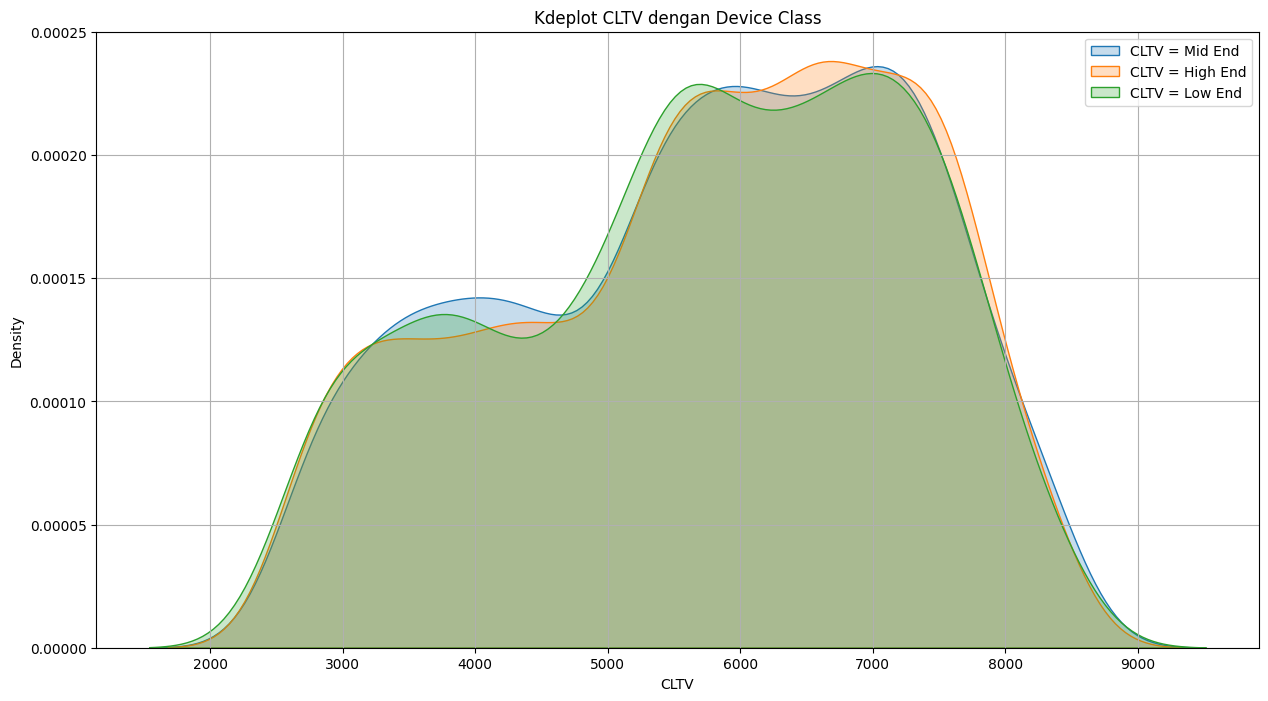

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='CLTV', data=df[df['Device Class'] == df['Device Class'].unique()[0]], fill=True, label=f"CLTV = {df['Device Class'].unique()[0]}")
sns.kdeplot(x='CLTV', data=df[df['Device Class'] == df['Device Class'].unique()[1]], fill=True, label=f"CLTV = {df['Device Class'].unique()[1]}")
sns.kdeplot(x='CLTV', data=df[df['Device Class'] == df['Device Class'].unique()[2]], fill=True, label=f"CLTV = {df['Device Class'].unique()[2]}")
plt.title('Kdeplot CLTV dengan Device Class')
plt.grid()
plt.legend()

## **Analisis distribusi jenis pembayaran pelanggan berdasarkan CLTV**

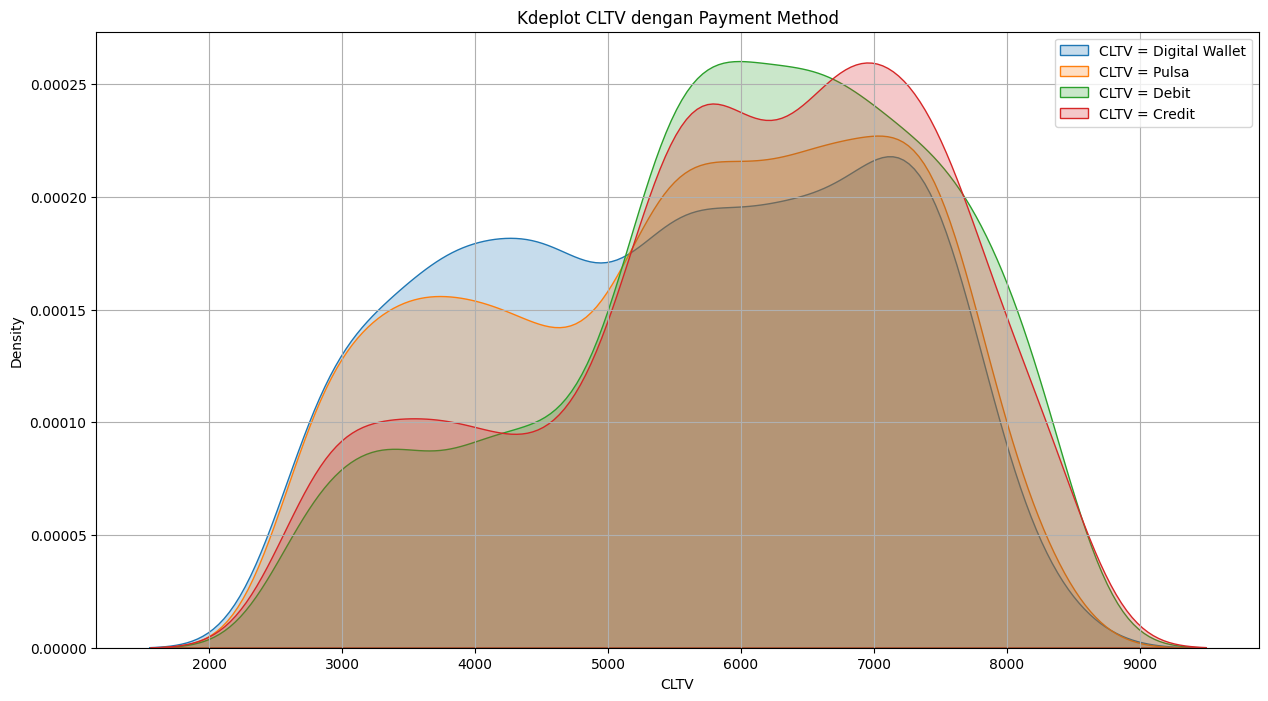

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x='CLTV', data=df[df['Payment Method'] == df['Payment Method'].unique()[0]], fill=True, label=f"CLTV = {df['Payment Method'].unique()[0]}")
sns.kdeplot(x='CLTV', data=df[df['Payment Method'] == df['Payment Method'].unique()[1]], fill=True, label=f"CLTV = {df['Payment Method'].unique()[1]}")
sns.kdeplot(x='CLTV', data=df[df['Payment Method'] == df['Payment Method'].unique()[2]], fill=True, label=f"CLTV = {df['Payment Method'].unique()[2]}")
sns.kdeplot(x='CLTV', data=df[df['Payment Method'] == df['Payment Method'].unique()[3]], fill=True, label=f"CLTV = {df['Payment Method'].unique()[3]}")
plt.title('Kdeplot CLTV dengan Payment Method')
plt.grid()
plt.legend()

# **Feature Engineering**

In [ ]:
data = df.copy(deep=True)
data.head()

Customer ID  Tenure Months Location Device Class Games Product  \
0           0              2  Jakarta      Mid End           Yes   
1           1              2  Jakarta     High End            No   
2           2              8  Jakarta     High End            No   
3           3             28  Jakarta     High End            No   
4           4             49  Jakarta     High End            No   

  Music Product Education Product Call Center Video Product Use MyApp  \
0           Yes                No          No            No        No   
1            No                No          No            No        No   
2            No               Yes          No           Yes       Yes   
3            No               Yes         Yes           Yes       Yes   
4           Yes               Yes          No           Yes       Yes   

   Payment Method  Monthly Purchase Churn Label   Longitude  Latitude    CLTV  \
0  Digital Wallet            70.005         Yes  106.816666      -6.2  4210.7   
1           Pulsa            91.910         Yes  106.816666      -6.2  3511.3   
2           Pulsa           129.545         Yes  106.816666      -6.2  6983.6   
3           Pulsa           136.240         Yes  106.816666      -6.2  6503.9   
4           Debit           134.810         Yes  106.816666      -6.2  6942.0   

       Tenure Status Monthly Purchase Category CLTV Category  
0  Pelanggan 1 Tahun        Pembelian Menengah   CLTV Rendah  
1  Pelanggan 1 Tahun          Pembelian Tinggi   CLTV Rendah  
2  Pelanggan 1 Tahun          Pembelian Tinggi   CLTV Tinggi  
3  Pelanggan 3 Tahun          Pembelian Tinggi   CLTV Tinggi  
4  Pelanggan 5 Tahun          Pembelian Tinggi   CLTV Tinggi

In [ ]:
data.drop(['Customer ID', 'Longitude', 'Latitude', 'Tenure Status', 'Monthly Purchase Category', 'CLTV Category'], axis=1, inplace=True)
data.head()

Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase Churn Label    CLTV  
0            70.005         Yes  4210.7  
1            91.910         Yes  3511.3  
2           129.545         Yes  6983.6  
3           136.240         Yes  6503.9  
4           134.810         Yes  6942.0

## **Scaling Data**

In [ ]:
le = LabelEncoder()

data_encode = data.copy(deep = True)
text_data_features = [i for i in data.columns if i not in data.describe().columns]

print('Label Encoder Transformation')
for i in text_data_features:
    data_encode[i] = le.fit_transform(data_encode[i])
    print(f"{i} : {data_encode[i].unique()} = {le.inverse_transform(data_encode[i].unique())}")

Label Encoder Transformation
Location : [1 0] = ['Jakarta' 'Bandung']
Device Class : [2 0 1] = ['Mid End' 'High End' 'Low End']
Games Product : [2 0 1] = ['Yes' 'No' 'No internet service']
Music Product : [2 0 1] = ['Yes' 'No' 'No internet service']
Education Product : [0 2 1] = ['No' 'Yes' 'No internet service']
Call Center : [0 1] = ['No' 'Yes']
Video Product : [0 2 1] = ['No' 'Yes' 'No internet service']
Use MyApp : [0 2 1] = ['No' 'Yes' 'No internet service']
Payment Method : [2 3 1 0] = ['Digital Wallet' 'Pulsa' 'Debit' 'Credit']
Churn Label : [1 0] = ['Yes' 'No']


In [ ]:
data_encode.describe().T

count         mean          std       min      25%  \
Tenure Months      7043.0    32.371149    24.559481     0.000     9.00   
Location           7043.0     0.714326     0.451767     0.000     0.00   
Device Class       7043.0     0.904160     0.879918     0.000     0.00   
Games Product      7043.0     0.790004     0.859848     0.000     0.00   
Music Product      7043.0     0.906432     0.880162     0.000     0.00   
Education Product  7043.0     0.904444     0.879949     0.000     0.00   
Call Center        7043.0     0.290217     0.453895     0.000     0.00   
Video Product      7043.0     0.985376     0.885002     0.000     0.00   
Use MyApp          7043.0     0.992475     0.885091     0.000     0.00   
Payment Method     7043.0     1.684367     1.148907     0.000     1.00   
Monthly Purchase   7043.0    84.190200    39.117061    23.725    46.15   
Churn Label        7043.0     0.265370     0.441561     0.000     0.00   
CLTV               7043.0  5720.384481  1537.974298  2603.900  4509.70   

                        50%       75%       max  
Tenure Months        29.000    55.000    72.000  
Location              1.000     1.000     1.000  
Device Class          1.000     2.000     2.000  
Games Product         1.000     2.000     2.000  
Music Product         1.000     2.000     2.000  
Education Product     1.000     2.000     2.000  
Call Center           0.000     1.000     1.000  
Video Product         1.000     2.000     2.000  
Use MyApp             1.000     2.000     2.000  
Payment Method        2.000     3.000     3.000  
Monthly Purchase     91.455   116.805   154.375  
Churn Label           0.000     1.000     1.000  
CLTV               5885.100  6994.650  8450.000

In [ ]:
categorical_features = []
numerical_features = []
for i in data_encode.columns:
    if len(data_encode[i].unique()) > 4:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', categorical_features)
print('Numerical Features :', numerical_features)

Categorical Features : ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method', 'Churn Label']
Numerical Features : ['Tenure Months', 'Monthly Purchase', 'CLTV']


In [ ]:
mms = MinMaxScaler()
ss = StandardScaler()

data_encode['Tenure Months'] = mms.fit_transform(data_encode[['Tenure Months']])
data_encode['Monthly Purchase'] = mms.fit_transform(data_encode[['Monthly Purchase']])
data_encode['CLTV'] = mms.fit_transform(data_encode[['CLTV']])
data_encode.head()

Tenure Months  Location  Device Class  Games Product  Music Product  \
0       0.027778         1             2              2              2   
1       0.027778         1             0              0              0   
2       0.111111         1             0              0              0   
3       0.388889         1             0              0              0   
4       0.680556         1             0              0              2   

   Education Product  Call Center  Video Product  Use MyApp  Payment Method  \
0                  0            0              0          0               2   
1                  0            0              0          0               3   
2                  2            0              2          2               3   
3                  2            1              2          2               3   
4                  2            0              2          2               1   

   Monthly Purchase  Churn Label      CLTV  
0          0.354229            1  0.274850  
1          0.521891            1  0.155215  
2          0.809950            1  0.749166  
3          0.861194            1  0.667111  
4          0.850249            1  0.742050

## **Matriks Korelasi**

In [ ]:
fig = px.imshow(data_encode.corr())

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title="Heatmap Korelasi Antar Atribut",
)

for i in range(len(data_encode.corr().index)):
    for j in range(len(data_encode.corr().columns)):
        fig.add_annotation(
            text=str(round(data_encode.corr().values[i][j], 2)),
            x=data_encode.corr().columns[i],
            y=data_encode.corr().index[j],
            showarrow=False
        )

fig.show()

## **Chi-Squared (Atribut kategorikal)**

In [ ]:
features = data_encode.loc[:, categorical_features]
target = data_encode.loc[:, 'Churn Label']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

feature_score = pd.DataFrame(data=fit.scores_,
                             index=features.columns,
                             columns=['Chi Squared Score'])

feature_score.sort_values(by='Chi Squared Score', ascending=False)

Chi Squared Score
Churn Label              5174.000000
Games Product             551.611529
Payment Method            381.188449
Device Class              349.689908
Music Product             230.086520
Education Product         191.303140
Call Center               135.559783
Use MyApp                   8.235399
Video Product               7.490203
Location                    0.148682

Location, video product, dan use my app tidak berarti dalam model dalam memprediksi nilai churn

## **Anova (Atribut Numerikal)**

In [ ]:
features = data_encode.loc[:, numerical_features]
target = data_encode.loc[:, 'Churn Label']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

feature_score = pd.DataFrame(data=fit.scores_,
                             index=features.columns,
                             columns = ['ANOVA Score'])

feature_score.sort_values(by='ANOVA Score', ascending=False)

ANOVA Score
Tenure Months      997.268010
Monthly Purchase   273.463704
CLTV               116.283252

# **Data Modelling**

## **Preprocessing**

In [ ]:
df_model = df.copy(deep=True)
df_model.head()

Customer ID  Tenure Months Location Device Class Games Product  \
0           0              2  Jakarta      Mid End           Yes   
1           1              2  Jakarta     High End            No   
2           2              8  Jakarta     High End            No   
3           3             28  Jakarta     High End            No   
4           4             49  Jakarta     High End            No   

  Music Product Education Product Call Center Video Product Use MyApp  \
0           Yes                No          No            No        No   
1            No                No          No            No        No   
2            No               Yes          No           Yes       Yes   
3            No               Yes         Yes           Yes       Yes   
4           Yes               Yes          No           Yes       Yes   

   Payment Method  Monthly Purchase Churn Label   Longitude  Latitude    CLTV  \
0  Digital Wallet            70.005         Yes  106.816666      -6.2  4210.7   
1           Pulsa            91.910         Yes  106.816666      -6.2  3511.3   
2           Pulsa           129.545         Yes  106.816666      -6.2  6983.6   
3           Pulsa           136.240         Yes  106.816666      -6.2  6503.9   
4           Debit           134.810         Yes  106.816666      -6.2  6942.0   

       Tenure Status Monthly Purchase Category CLTV Category  
0  Pelanggan 1 Tahun        Pembelian Menengah   CLTV Rendah  
1  Pelanggan 1 Tahun          Pembelian Tinggi   CLTV Rendah  
2  Pelanggan 1 Tahun          Pembelian Tinggi   CLTV Tinggi  
3  Pelanggan 3 Tahun          Pembelian Tinggi   CLTV Tinggi  
4  Pelanggan 5 Tahun          Pembelian Tinggi   CLTV Tinggi

Berdasarkan analisis menggunakan chi-squared dan anova. Atribut yang tidak terlalu berpengaruh terhadap model churn adalah Use MyApp, Video Product, dan Location. Maka kita akan drop kolom tersebut di pelatihan model nanti

In [ ]:
df_model.drop(['Customer ID', 'Tenure Status', 'Monthly Purchase Category', 'CLTV Category', 'Longitude', 'Latitude'], axis=1, inplace=True)
df_model.head()

Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase Churn Label    CLTV  
0            70.005         Yes  4210.7  
1            91.910         Yes  3511.3  
2           129.545         Yes  6983.6  
3           136.240         Yes  6503.9  
4           134.810         Yes  6942.0

In [ ]:
# df_model.drop(['Customer ID', 'Tenure Status', 'Monthly Purchase Category', 'CLTV Category', 'Segment', 'Longitude', 'Latitude', 'Location'], axis=1, inplace=True)
# df_model.head()

In [ ]:
kolom = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Call Center', 'Use MyApp']

for i in kolom:
  print(f"Jumlah nilai yang unik pada kolom {i}: {df_model[i].nunique()}")
  print(f"Dengan nilai yang unik pada kolom {i}: {df_model[i].unique()}")
  print()

Jumlah nilai yang unik pada kolom Games Product: 3
Dengan nilai yang unik pada kolom Games Product: ['Yes' 'No' 'No internet service']

Jumlah nilai yang unik pada kolom Music Product: 3
Dengan nilai yang unik pada kolom Music Product: ['Yes' 'No' 'No internet service']

Jumlah nilai yang unik pada kolom Education Product: 3
Dengan nilai yang unik pada kolom Education Product: ['No' 'Yes' 'No internet service']

Jumlah nilai yang unik pada kolom Video Product: 3
Dengan nilai yang unik pada kolom Video Product: ['No' 'Yes' 'No internet service']

Jumlah nilai yang unik pada kolom Call Center: 2
Dengan nilai yang unik pada kolom Call Center: ['No' 'Yes']

Jumlah nilai yang unik pada kolom Use MyApp: 3
Dengan nilai yang unik pada kolom Use MyApp: ['No' 'Yes' 'No internet service']



### **Proses pengubahan nilai atribut 'No internet service' menjadi 'No'**

In [ ]:
kolom = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp']

for i in kolom:
  df_model[i] = df_model[i].replace('No internet service', 'No')
  print(f"Jumlah nilai yang unik pada kolom {i}: {df_model[i].unique()}")

Jumlah nilai yang unik pada kolom Games Product: ['Yes' 'No']
Jumlah nilai yang unik pada kolom Music Product: ['Yes' 'No']
Jumlah nilai yang unik pada kolom Education Product: ['No' 'Yes']
Jumlah nilai yang unik pada kolom Video Product: ['No' 'Yes']
Jumlah nilai yang unik pada kolom Use MyApp: ['No' 'Yes']


### **Proses pengelompokkan atribut (kategorikal, numerikal, binary, one hot)**

In [ ]:
df_model.head()

Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase Churn Label    CLTV  
0            70.005         Yes  4210.7  
1            91.910         Yes  3511.3  
2           129.545         Yes  6983.6  
3           136.240         Yes  6503.9  
4           134.810         Yes  6942.0

In [ ]:
cols = df_model.columns

cat_cols = [col for col in cols if df_model[col].dtype == "O"]
num_cols = [col for col in cols if df_model[col].dtype != "O"]
binary_cols = [col for col in cols if df_model[col].nunique() == 2]
ohe_cols = [col for col in cat_cols if df_model[col].nunique() > 2]

cat_cols.remove("Churn Label")
num_cols.remove("CLTV")

print("Kolom Kategorikal: ", cat_cols)
print("Kolom Numerikal: ", num_cols)
print("Kolom Biner: ", binary_cols)
print("Kolom One Hot: ", ohe_cols)

Kolom Kategorikal:  ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method']
Kolom Numerikal:  ['Tenure Months', 'Monthly Purchase']
Kolom Biner:  ['Location', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Churn Label']
Kolom One Hot:  ['Device Class', 'Payment Method']


### **Proses Label Encoder**

In [ ]:
device_encoder = LabelEncoder()
df_model['Device Class'] = device_encoder.fit_transform(np.ravel(df_model['Device Class'].values))
print(f"Dari {device_encoder.classes_} menjadi {df_model['Device Class'].unique()}")

loc_encoder = LabelEncoder()
df_model['Location'] = loc_encoder.fit_transform(np.ravel(df_model['Location'].values))
print(f"Dari {loc_encoder.classes_} menjadi {df_model['Location'].unique()}")

games_encoder = LabelEncoder()
df_model['Games Product'] = games_encoder.fit_transform(np.ravel(df_model['Games Product'].values))
print(f"Dari {games_encoder.classes_} menjadi {df_model['Games Product'].unique()}")

music_encoder = LabelEncoder()
df_model['Music Product'] = music_encoder.fit_transform(np.ravel(df_model['Music Product'].values))
print(f"Dari {music_encoder.classes_} menjadi {df_model['Music Product'].unique()}")

education_encoder = LabelEncoder()
df_model['Education Product'] = education_encoder.fit_transform(np.ravel(df_model['Education Product'].values))
print(f"Dari {education_encoder.classes_} menjadi {df_model['Education Product'].unique()}")

call_center_encoder = LabelEncoder()
df_model['Call Center'] = call_center_encoder.fit_transform(np.ravel(df_model['Call Center'].values))
print(f"Dari {call_center_encoder.classes_} menjadi {df_model['Call Center'].unique()}")

payment_encoder = LabelEncoder()
df_model['Payment Method'] = payment_encoder.fit_transform(np.ravel(df_model['Payment Method'].values))
print(f"Dari {payment_encoder.classes_} menjadi {df_model['Payment Method'].unique()}")

video_encoder = LabelEncoder()
df_model['Video Product'] = video_encoder.fit_transform(np.ravel(df_model['Video Product'].values))
print(f"Dari {video_encoder.classes_} menjadi {df_model['Video Product'].unique()}")

myapp_encoder = LabelEncoder()
df_model['Use MyApp'] = myapp_encoder.fit_transform(np.ravel(df_model['Use MyApp'].values))
print(f"Dari {myapp_encoder.classes_} menjadi {df_model['Use MyApp'].unique()}")

df_model['Churn Label'] = df_model['Churn Label'].replace('Yes', 1)
df_model['Churn Label'] = df_model['Churn Label'].replace('No', 0)
print(df_model['Churn Label'].unique())

Dari ['High End' 'Low End' 'Mid End'] menjadi [2 0 1]
Dari ['Bandung' 'Jakarta'] menjadi [1 0]
Dari ['No' 'Yes'] menjadi [1 0]
Dari ['No' 'Yes'] menjadi [1 0]
Dari ['No' 'Yes'] menjadi [0 1]
Dari ['No' 'Yes'] menjadi [0 1]
Dari ['Credit' 'Debit' 'Digital Wallet' 'Pulsa'] menjadi [2 3 1 0]
Dari ['No' 'Yes'] menjadi [0 1]
Dari ['No' 'Yes'] menjadi [0 1]
[1 0]


## **Churn Label**

### **Pengelompokkan model dan pemilihan metrik evaluasi**

Dalam kasus prediksi churn pelanggan, metrik evaluasi recall sangat penting dalam kasus ini, karena kita harus dapat mengidentifikasi yang Churn (True Positive) dan memastikan bahwa perusahaan tidak kehilangan profit.

Recall, juga dikenal sebagai sensitivitas atau True Positive Rate, adalah ukuran yang menunjukkan seberapa baik model kita dalam mengidentifikasi pelanggan yang benar-benar churn. Dengan kata lain, recall memberi kita gambaran tentang seberapa banyak pelanggan yang benar-benar churn yang berhasil kita identifikasi.

Mengapa ini penting? Karena dalam bisnis, kehilangan pelanggan bisa berarti kehilangan pendapatan. Jika kita bisa mengidentifikasi pelanggan yang mungkin churn lebih awal, kita bisa melakukan tindakan pencegahan untuk mempertahankan mereka, seperti menawarkan promosi atau meningkatkan layanan pelanggan. Oleh karena itu, memiliki recall yang tinggi dalam prediksi churn pelanggan bisa sangat membantu dalam meminimalkan kerugian dan memaksimalkan keuntungan.

In [ ]:
X = df_model.drop(['Churn Label', 'CLTV'], axis=1)
y_churn = df_model['Churn Label']

X_train, X_test, y_train_churn, y_test_churn = train_test_split(X, y_churn, test_size=0.2)

In [ ]:
models_churn = [("LR", LogisticRegression()),
                ("KNN", KNeighborsClassifier()),
                ("DT", DecisionTreeClassifier()),
                ("RF", RandomForestClassifier()),
                ("GBM", GradientBoostingClassifier()),
                ("XGB", XGBClassifier()),
                ("LGBM", LGBMClassifier(verbose=-1)),
                ("ADA", AdaBoostClassifier()),
                ("CatBoost", CatBoostClassifier(verbose=False))]

transformer_churn = ColumnTransformer([("OHE", OneHotEncoder(), ohe_cols)], remainder="passthrough")

for name, model in models_churn:
    pipe_churn = Pipeline([("transformer", transformer_churn), ("model", model)])
    y_pred_churn = pipe_churn.fit(X_train, y_train_churn)
    y_pred_churn.predict(X_test)
    kfold_churn = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(pipe_churn, X_train, y_train_churn, cv=kfold_churn, scoring="recall")
    print(f"{name} Churn Recall: {cv_result.mean()}")

LR Churn Recall: 0.5
KNN Churn Recall: 0.49799999999999994
DT Churn Recall: 0.492
RF Churn Recall: 0.49000000000000005
GBM Churn Recall: 0.5086666666666666
XGB Churn Recall: 0.5073333333333333
LGBM Churn Recall: 0.508
ADA Churn Recall: 0.49466666666666664
CatBoost Churn Recall: 0.5013333333333334


Berdasarkan base model diatas, LGBM memperoleh recall score terbaik (sebelum penanganan imbalance)

### **Proses penanganan imbalance data dan penentuan recall terbaik**

- scale_pos_weight adalah parameter XGBoost, LightGBM, dan CatBoost yang digunakan terutama dalam masalah klasifikasi dengan kelas-kelas yang tidak seimbang. Parameter scale_pos_weight membantu kita menentukan cara membobotkan instance dari kelas positif relatif terhadap kelas negatif.

- Masalah klasifikasi dengan kelas yang tidak seimbang mengacu pada situasi di mana kelas positif memiliki lebih sedikit contoh daripada kelas negatif. Dalam kasus seperti itu, kita mungkin ingin meningkatkan kemampuan model untuk mengklasifikasikan kelas positif dengan benar. Parameter scale_pos_weight dapat memperbaiki ketidakseimbangan ini.

- Nilai scale_pos_weight menentukan seberapa besar bobot kelas negatif dibandingkan kelas positif. Sebagai contoh, jika kelas positif lebih jarang, kita dapat mengatur scale_pos_weight untuk mencerminkan kelangkaan kelas positif relatif terhadap kelas negatif. Hal ini dapat membantu model untuk lebih menekankan kelas positif dan membantu kita mencapai hasil yang lebih seimbang.

- class_weight memungkinkan kita untuk menyesuaikan bobot kelas. Pada set data yang tidak seimbang, kita dapat meningkatkan bobot kelas minoritas. Sebagai contoh class_weight = "balanced" berarti bobot kelas negatif dan positif sama.

- class_weight="balanced" menangkap lebih banyak kejadian yang benar (TRUE recall yang lebih tinggi) tetapi juga lebih mungkin mendapatkan peringatan yang salah (TRUE precision yang lebih rendah).

In [ ]:
X = df_model.drop(["Churn Label", "CLTV"], axis=1)
y_churn = df_model["Churn Label"]

X_train, X_test, y_train_churn, y_test_churn = train_test_split(X, y_churn, test_size=0.2, stratify=y_churn)

In [ ]:
transformer_churn = ColumnTransformer([("OHE", OneHotEncoder(), ohe_cols),
                                       ("Scaler", MinMaxScaler(), num_cols)], remainder="passthrough")

models_churn = [("LR", LogisticRegression(class_weight='balanced')),
                ("KNN", KNeighborsClassifier()),
                ("DT", DecisionTreeClassifier(class_weight='balanced')),
                ("RF", RandomForestClassifier(class_weight='balanced')),
                ("GBM", GradientBoostingClassifier(learning_rate=0.1)),
                ("XGB", XGBClassifier(class_weight='balanced', scale_pos_weight=5, learning_rate=0.1)),
                ("LGBM", LGBMClassifier(verbose=-1, class_weight='balanced', scale_pos_weight=5, learning_rate=0.1)),
                ("ADA", AdaBoostClassifier(learning_rate=0.1)),
                ("CatBoost", CatBoostClassifier(verbose=False, scale_pos_weight=5, learning_rate=0.1))]

for name, model in models_churn:
    pipe_churn = Pipeline([("transformer", transformer_churn), ("model", model)])
    y_pred_churn = pipe_churn.fit(X_train, y_train_churn)
    y_pred_churn.predict(X_test)
    kfold_churn = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(pipe_churn, X_train, y_train_churn, cv=kfold_churn, scoring="recall")
    print(f"{name} Churn Recall dengan scaler: {cv_result.mean()}")

LR Churn Recall dengan scaler: 0.7531772575250836
KNN Churn Recall dengan scaler: 0.46153846153846156
DT Churn Recall dengan scaler: 0.47892976588628766
RF Churn Recall dengan scaler: 0.47157190635451507
GBM Churn Recall dengan scaler: 0.5023411371237458
XGB Churn Recall dengan scaler: 0.8167224080267559
LGBM Churn Recall dengan scaler: 0.8809364548494983
ADA Churn Recall dengan scaler: 0.3585284280936455
CatBoost Churn Recall dengan scaler: 0.6882943143812709


Model terbaik berdasarkan metrik recall -> LGBM

### **Plot ROC Curve LGBM**

Text(0.5, 1.0, 'LGBM ROC Curve')

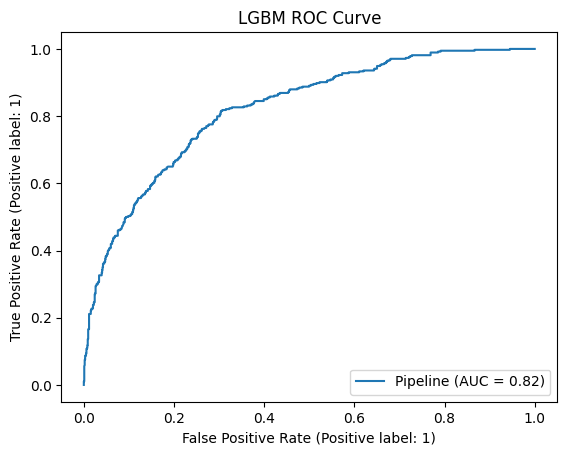

In [ ]:
pipe_lgb = Pipeline([("transformer", transformer_churn),
                   ("clf", LGBMClassifier(scale_pos_weight=5, class_weight="balanced", verbose=-1, learning_rate=0.1))])

y_pred_churn_lgb = pipe_lgb.fit(X_train, y_train_churn).predict(X_test)

RocCurveDisplay.from_estimator(pipe_lgb, X_test, y_test_churn)
plt.title("LGBM ROC Curve")

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1035
           1       0.41      0.87      0.56       374

    accuracy                           0.63      1409
   macro avg       0.67      0.71      0.62      1409
weighted avg       0.79      0.63      0.65      1409



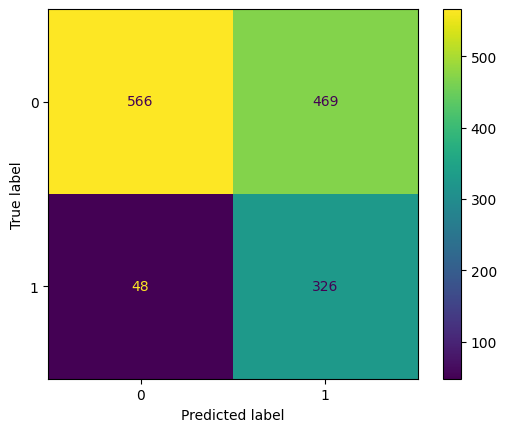

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_churn, y_pred_churn_lgb)).plot()
print(classification_report(y_test_churn, y_pred_churn_lgb))

In [ ]:
cv_result = cross_val_score(pipe_lgb, X_train, y_train_churn, cv=kfold_churn, scoring="recall")
print(cv_result.mean())

0.8882943143812708


### **Hyperparams LightGBM**

In [ ]:
pipe_lgb.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('OHE', OneHotEncoder(),
                                    ['Device Class', 'Payment Method']),
                                   ('Scaler', MinMaxScaler(),
                                    ['Tenure Months', 'Monthly Purchase'])])),
  ('clf',
   LGBMClassifier(class_weight='balanced', scale_pos_weight=5, verbose=-1))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('OHE', OneHotEncoder(),
                                  ['Device Class', 'Payment Method']),
                                 ('Scaler', MinMaxScaler(),
                                  ['Tenure Months', 'Monthly Purchase'])]),
 'clf': LGBMClassifier(class_weight='balanced', scale_pos_weight=5, verbose=-1),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer

In [ ]:
lgbm_params = {"clf__learning_rate": [0.01, 0.1, 1],
               "clf__n_estimators": [i for i in range(100, 2100, 100)],
               "clf__colsample_bytree": [0.5, 0,7, 1],
               "clf__scale_pos_weight": [5],
               "clf__max_depth": [i for i in range(-1, 9, 1)]}

gs_lgb = RandomizedSearchCV(pipe_lgb, lgbm_params, cv=kfold_churn, scoring="recall").fit(X_train, y_train_churn)

In [ ]:
gs_lgb.best_params_

{'clf__scale_pos_weight': 5,
 'clf__n_estimators': 200,
 'clf__max_depth': 2,
 'clf__learning_rate': 0.01,
 'clf__colsample_bytree': 1}

### **Validasi**

Text(0.5, 1.0, 'LGBM Final ROC Curve')

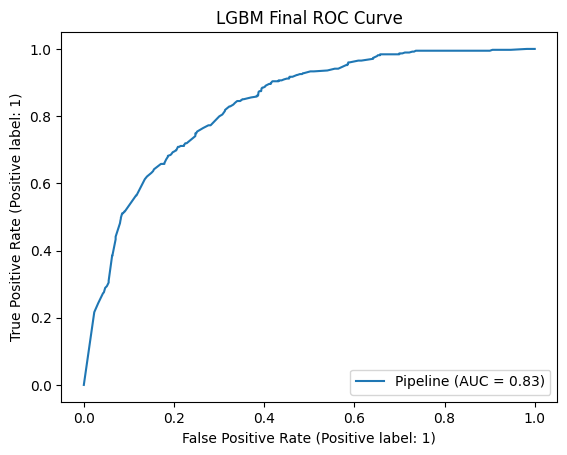

In [ ]:
lgbm_final = pipe_lgb.set_params(**gs_lgb.best_params_).fit(X_train, y_train_churn)

y_pred_churn_final = lgbm_final.predict(X_test)

RocCurveDisplay.from_estimator(lgbm_final, X_test, y_test_churn)
plt.title("LGBM Final ROC Curve")

              precision    recall  f1-score   support

           0       0.98      0.30      0.46      1035
           1       0.34      0.99      0.50       374

    accuracy                           0.48      1409
   macro avg       0.66      0.64      0.48      1409
weighted avg       0.81      0.48      0.47      1409



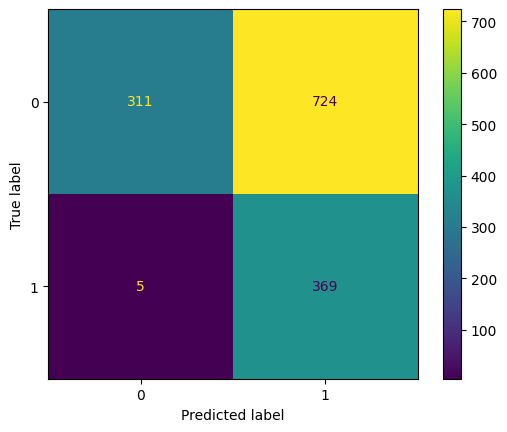

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_churn, y_pred_churn_final)).plot()
print(classification_report(y_test_churn, y_pred_churn_final))

In [ ]:
cv_result = cross_val_score(lgbm_final, X_train, y_train_churn, cv=kfold_churn, scoring="recall")
print(cv_result.mean())

0.9826086956521738


### **Kesimpulan**

- Metrik yang penting bagi kita dalam masalah churn adalah Recall Score (TP/TP+FN) karena kita harus dapat mengidentifikasi yang Churn (True Positive) dan memastikan bahwa perusahaan tidak kehilangan profit.

- Model terbaik berdasarkan skor recall adalah model LightGBM dari ke-9 model lainnya

- Model LightGBM akhir dioptimalkan dengan hyperparams untuk meningkatkan skor recall dari 0.89 menjadi 0.98, dan skor cv dari 0.88 menjadi 0.97

## **CLTV**

### **Pengelompokkan model dan pemilihan metrik evaluasi**

In [ ]:
X = df_model.drop(['Churn Label', 'CLTV'], axis=1)
y_cltv = df_model['CLTV']

X_train, X_test, y_train_cltv, y_test_cltv = train_test_split(X, y_cltv, test_size=0.2)

In [ ]:
models_cltv = [("LR", LinearRegression()),
                ("KNN", KNeighborsRegressor()),
                ("DT", DecisionTreeRegressor()),
                ("RF", RandomForestRegressor()),
                ("GBM", GradientBoostingRegressor()),
                ("XGB", XGBRegressor()),
                ("LGBM", LGBMRegressor(verbose=-1)),
                ("ADA", AdaBoostRegressor()),
                ("CatBoost", CatBoostRegressor(verbose=False))]

transformer_cltv = ColumnTransformer([("OHE", OneHotEncoder(), ohe_cols),
                                       ("Scaler", MinMaxScaler(), num_cols)], remainder="passthrough")

kf = KFold(n_splits=5, shuffle=True)

for name, model in models_cltv:
    mae_scores = []

    for train_index, val_index in kf.split(X_train, y_train_cltv):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train_cltv.iloc[train_index], y_train_cltv.iloc[val_index]

        pipe_cltv = Pipeline([("transformer", transformer_cltv), ("model", model)])
        y_pred_cltv = pipe_cltv.fit(X_train_fold, y_train_fold).predict(X_val_fold)

        mae = mean_absolute_error(y_val_fold, y_pred_cltv)
        mae_scores.append(mae)

    mae_mean = np.mean(mae_scores)
    print(f"{name} CLTV mae: {mae_mean}")

LR CLTV mae: 1184.0668201015444
KNN CLTV mae: 1267.463720775854
DT CLTV mae: 1544.692074272013
RF CLTV mae: 1214.8187758591946
GBM CLTV mae: 1149.2468191715484
XGB CLTV mae: 1238.541853171469
LGBM CLTV mae: 1177.1710557922065
ADA CLTV mae: 1146.8742822114832
CatBoost CLTV mae: 1184.5035090339672


Berdasarkan skor mae, AdaBoost memperoleh nilai mae paling minimum

---



### **Plot aktual vs prediksi**

In [ ]:
pipe_ada = Pipeline([("transformer", transformer_cltv),
                   ("clf", AdaBoostRegressor())])

y_pred_cltv_ada = pipe_ada.fit(X_train, y_train_cltv).predict(X_test)

data_pred = pd.DataFrame({'Actual CLTV': y_test_cltv, 'Predicted CLTV': y_pred_cltv_ada})

fig = px.scatter(data_pred, x='Actual CLTV', y='Predicted CLTV', title='Actual vs Prediksi CLTV')
fig.show()

### **Hyperparams AdaBoost**

In [ ]:
pipe_ada.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('OHE', OneHotEncoder(),
                                    ['Device Class', 'Payment Method']),
                                   ('Scaler', MinMaxScaler(),
                                    ['Tenure Months', 'Monthly Purchase'])])),
  ('clf', AdaBoostRegressor())],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('OHE', OneHotEncoder(),
                                  ['Device Class', 'Payment Method']),
                                 ('Scaler', MinMaxScaler(),
                                  ['Tenure Months', 'Monthly Purchase'])]),
 'clf': AdaBoostRegressor(),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights': None,
 'transformer__transformers': [('OHE',
   OneHotEncoder(),
   ['Device Class'

In [ ]:
pipe_ada = Pipeline([("transformer", transformer_cltv),
                   ("clf", AdaBoostRegressor())])

ada_params = {"clf__n_estimators" : [i for i in range(1, 51)],
             "clf__learning_rate" : [0.01, 0.1, 1],
             "clf__random_state" : [i for i in range(1, 51)]}

gs_ada = RandomizedSearchCV(pipe_ada, ada_params, cv=kf, scoring="neg_mean_absolute_error").fit(X_train, y_train_cltv)

In [ ]:
gs_ada.best_params_

{'clf__random_state': 46, 'clf__n_estimators': 16, 'clf__learning_rate': 1}

### **Validasi**

In [ ]:
ada_final = pipe_ada.set_params(**gs_ada.best_params_).fit(X_train, y_train_cltv)

y_pred_cltv_final = ada_final.predict(X_test)

data_pred = pd.DataFrame({'Actual CLTV': y_test_cltv, 'Predicted CLTV': y_pred_cltv_final})

print(f"mae = {mean_absolute_error(y_test_cltv, y_pred_cltv_final)}")

fig = px.scatter(data_pred, x='Actual CLTV', y='Predicted CLTV', title='Actual vs Prediksi CLTV')
fig.show()

mae = 1162.7490836443044


### **Kesimpulan**

## **Testing**

In [ ]:
print(df['Monthly Purchase'].max())
print(df['Monthly Purchase'].min())

154.375
23.725


### **Prediksi 1**

- Metrik evaluasi yang cocok adalah mae

In [ ]:
# Prediksi 1
data = pd.DataFrame({
    'Location': ['Jakarta'],
    'Tenure Months': [72],
    'Device Class': ['High End'],
    'Games Product': ['Yes'],
    'Music Product': ['Yes'],
    'Education Product': ['Yes'],
    'Call Center': ['Yes'],
    'Payment Method': ['Debit'],
    'Video Product': ['Yes'],
    'Use MyApp': ['Yes'],
    'Monthly Purchase': [100]
})

data['Location'] = loc_encoder.transform(data['Location'])
data['Device Class'] = device_encoder.transform(data['Device Class'])
data['Games Product'] = games_encoder.transform(data['Games Product'])
data['Music Product'] = music_encoder.transform(data['Music Product'])
data['Education Product'] = education_encoder.transform(data['Education Product'])
data['Call Center'] = call_center_encoder.transform(data['Call Center'])
data['Payment Method'] = payment_encoder.transform(data['Payment Method'])
data['Video Product'] = video_encoder.transform(data['Video Product'])
data['Use MyApp'] = myapp_encoder.transform(data['Use MyApp'])

churn_prediction = lgbm_final.predict_proba(data)
if churn_prediction[0][1] >= 0.5:
    print(f"Churn: Yes, dengan persentase Yes: {round(churn_prediction[0][1], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(ada_final.predict(data)[0], 2)}")
else:
    print(f"Churn: No, dengan persentase No: {round(churn_prediction[0][0], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(ada_final.predict(data)[0], 2)}")

Churn: Yes, dengan persentase Yes: 51.0%
Dengan nilai CLTV: 6804.18


### **Prediksi 2**

In [ ]:
# Prediksi 2
data = pd.DataFrame({
    'Location': ['Jakarta'],
    'Tenure Months': [1],
    'Device Class': ['High End'],
    'Games Product': ['No'],
    'Music Product': ['No'],
    'Education Product': ['No'],
    'Call Center': ['No'],
    'Payment Method': ['Pulsa'],
    'Video Product': ['No'],
    'Use MyApp': ['No'],
    'Monthly Purchase': [50]
})

data['Location'] = loc_encoder.transform(data['Location'])
data['Device Class'] = device_encoder.transform(data['Device Class'])
data['Games Product'] = games_encoder.transform(data['Games Product'])
data['Music Product'] = music_encoder.transform(data['Music Product'])
data['Education Product'] = education_encoder.transform(data['Education Product'])
data['Call Center'] = call_center_encoder.transform(data['Call Center'])
data['Payment Method'] = payment_encoder.transform(data['Payment Method'])
data['Video Product'] = video_encoder.transform(data['Video Product'])
data['Use MyApp'] = myapp_encoder.transform(data['Use MyApp'])

churn_prediction = lgbm_final.predict_proba(data)
if churn_prediction[0][1] >= 0.5:
    print(f"Churn: Yes, dengan persentase Yes: {round(churn_prediction[0][1], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(ada_final.predict(data)[0], 2)}")
else:
    print(f"Churn: No, dengan persentase No: {round(churn_prediction[0][0], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(ada_final.predict(data)[0], 2)}")

Churn: Yes, dengan persentase Yes: 89.0%
Dengan nilai CLTV: 5224.74


### **Import ke pickle**

In [ ]:
data = {
    'LocationEncoder' : loc_encoder,
    'DeviceEncoder' : device_encoder,
    'GamesEncoder' : games_encoder,
    'MusicEncoder' : music_encoder,
    'EducationEncoder' : education_encoder,
    'CallCenterEncoder' : call_center_encoder,
    'PaymentEncoder' : payment_encoder,
    'VideoEncoder' : video_encoder,
    'MyAppEncoder' : myapp_encoder,
    'LGBM_Churn' : lgbm_final,
    'AdaBoost_CLTV' : ada_final
}

with open('model.pkl', 'wb') as file:
  pickle.dump(data, file)

### **Load dari pickle**

In [ ]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

tabel = pd.DataFrame({
    'Location': ['Jakarta'],
    'Tenure Months': [1],
    'Device Class': ['High End'],
    'Games Product': ['No'],
    'Music Product': ['No'],
    'Education Product': ['No'],
    'Call Center': ['No'],
    'Payment Method': ['Pulsa'],
    'Video Product': ['No'],
    'Use MyApp': ['No'],
    'Monthly Purchase': [50]
})

tabel['Location'] = data['LocationEncoder'].transform(tabel['Location'])
tabel['Device Class'] = data['DeviceEncoder'].transform(tabel['Device Class'])
tabel['Games Product'] = data['GamesEncoder'].transform(tabel['Games Product'])
tabel['Music Product'] = data['MusicEncoder'].transform(tabel['Music Product'])
tabel['Education Product'] = data['EducationEncoder'].transform(tabel['Education Product'])
tabel['Call Center'] = data['CallCenterEncoder'].transform(tabel['Call Center'])
tabel['Payment Method'] = data['PaymentEncoder'].transform(tabel['Payment Method'])
tabel['Video Product'] = data['VideoEncoder'].transform(tabel['Video Product'])
tabel['Use MyApp'] = data['MyAppEncoder'].transform(tabel['Use MyApp'])

churn_prediction = data['LGBM_Churn'].predict_proba(tabel)
if churn_prediction[0][1] >= 0.5:
    print(f"Churn: Yes, dengan persentase Yes: {round(churn_prediction[0][1], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(data['AdaBoost_CLTV'].predict(tabel)[0], 2)}")
else:
    print(f"Churn: No, dengan persentase No: {round(churn_prediction[0][0], 2)*100}%")
    print(f"Dengan nilai CLTV: {round(data['AdaBoost_CLTV'].predict(tabel)[0], 2)}")

Churn: Yes, dengan persentase Yes: 89.0%
Dengan nilai CLTV: 5224.74
